# Bonus Quest

**Difficulty:** A

**Description:** Students are in a tough spot after changing the grading formula for assignments and now fear taking the exam without a 3.5 GPA. The system gives players a chance to raise their score by completing this bonus quest. This is your Solo Leveling. Survive at all costs. Good luck!

**Goal:** Complete the bonus assignment created by Andrei and corrected by Max.

**Deliverables:**
- Jupyter Notebook (ipynb) file with solution and all cell outputs
- CSV file with model predictions
- Both files uploaded to GitHub repository

**Reward:**
- Bonus points for the Assignment part.
- Title “The one who overcomes the difficulties of fate.”
- +1000 EXP in mastering sklearn
- Skill Upgrade «ML Engineering Lv.2»
- Special Item: [???]

---

## Problem Statement

As a dataset, use Russian news from Balto-Slavic Natural Language Processing 2019 (helsinki.fi). Entities of interest: PER, ORG, LOC, EVT, PRO (see Guidelines_20190122.pdf (helsinki.fi)).

It is sufficient to use 9 documents about Brexit from the sample provided by the organizers.

## Approach

This assignment combines traditional ML methods (using scikit-learn) with modern LLM-based approaches (DeepSeek) for comparison. You will:
1. Formulate the problem as a machine learning task
2. Prepare features and split data appropriately
3. Train and compare multiple models using scikit-learn
4. Evaluate models using proper train/test splits
5. Compare ML model performance with DeepSeek responses
6. Analyze results in terms of course concepts (bias-variance tradeoff, overfitting, generalization)


Example of one document:

ru-10

ru

2018-09-20

https://rg.ru/2018/09/20/tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.html

Theresa May expects to stay in the saddle until the completion of the Brexit procedure
However, according to British media reports, at the upcoming Conservative Party conference at the end of September, May's opponents will give her a serious fight, from which it is not certain that she will emerge victorious. The bookmakers' favorite as a possible replacement for the current prime minister, former British Foreign Secretary Boris Johnson intends to deliver an alternative report that will leave no stone unturned from the government's views on the conditions of "Brexit". From Johnson's point of view, "London has wrapped the British constitution in a suicide belt and handed the detonator to Michel Barnier (Brussels' chief Brexit negotiator. - Ed.)". It is with this metaphor that the head of the British government will have to fight at the conference.


Github: https://github.com/Showerxxl/HW5_BONUS (csv файл)

### Task 1
**Problem Formulation & ML Perspective**

Describe the task from both NLP and ML perspectives:
- What kind of machine learning problem is this? (classification, sequence labeling, etc.)
- How can this be formulated as a supervised learning problem?
- What classical ML methods exist for solving it? (e.g., logistic regression, naive Bayes, SVM with text features)
- How can it be solved using modern LLMs like DeepSeek?
- What are the assumptions of different model classes? (e.g., linear models vs. more complex approaches)
- How is model quality typically evaluated in this task? What metrics are appropriate and why?


### Характер задачи и ML-постановка

Это задача **Named Entity Recognition (NER)** — извлечение именованных сущностей из текста с их категоризацией по типам: PER (персоны), ORG (организации), LOC (локации), EVT (события), PRO (продукты).

С точки зрения машинного обучения NER относится к **sequence tagging** (разметке последовательностей). Каждому токену в тексте присваивается метка типа сущности. Традиционно используется BIO-схема: B-начало сущности, I-продолжение, O-не является сущностью.

### Supervised Learning формулировка

Задача решается как обучение с учителем на размеченных текстах:

**Обучающие данные:** коллекция документов с аннотациями — для каждой сущности известны её границы (начало и конец) и категория.

**Признаки (features):** числовое представление текста — векторизация слов (TF-IDF, word embeddings), морфологические признаки (регистр, пунктуация), контекстные признаки (окружающие слова).

**Целевая переменная:** категория сущности для каждого упоминания.

**Критически важно:** разделение на train/test должно происходить на уровне документов, а не отдельных сущностей, чтобы предотвратить утечку контекстной информации между выборками.

### Классические методы машинного обучения

Традиционный подход состоит из двух этапов: feature engineering и обучение модели.

**Извлечение признаков:**
- Лексические: сами слова, их леммы, n-граммы
- Морфологические: регистр букв, наличие цифр/спецсимволов, длина слова
- Контекстные: слова в окне ±k позиций
- Словарные: принадлежность к словарям имён, географических названий и т.д.

**Алгоритмы классификации:**
- **SVM с линейным ядром** — эффективен на разреженных векторах текстовых признаков
- **Logistic Regression** — простой и интерпретируемый базовый подход
- **Random Forest / XGBoost** — ансамбли деревьев, хорошо работают с гетерогенными признаками
- **CRF (Conditional Random Fields)** — специализированный метод для структурированного предсказания, моделирует взаимосвязи между соседними метками в последовательности
- **Perceptron / Structured Perceptron** — онлайн-алгоритмы для sequence labeling

### Подход с большими языковыми моделями

Современные LLM (включая DeepSeek) позволяют решать NER иначе:

**Промптинг (prompting):** модели даётся инструкция в текстовой форме с описанием задачи и, опционально, примерами (few-shot learning). Модель генерирует ответ в требуемом формате.

**Преимущества:**
- Не требуется обучение на специфичных данных
- Модель использует широкие предобученные знания о мире
- Гибкость: можно менять формат вывода через промпт

**Недостатки:**
- Нестабильность: форматирование ответов может варьироваться
- Галлюцинации: модель может "придумывать" сущности
- Проблемы с границами: точное определение начала/конца сущности может быть неточным
- Вычислительная стоимость: требуются значительные ресурсы

### Предположения различных классов моделей

**Линейные классификаторы (SVM, LogReg):** 
- Предполагают линейную разделимость в признаковом пространстве
- Сильно зависят от качества ручного feature engineering
- Каждое предсказание делается независимо от других (не учитывают структуру последовательности)

**Ансамбли деревьев (RF, GBM):**
- Способны захватывать нелинейные паттерны и взаимодействия признаков
- Робастны к выбросам и не требуют нормализации
- Также делают независимые предсказания для каждого токена

**CRF:**
- Моделирует всю последовательность целиком
- Учитывает вероятностные зависимости между соседними метками
- Гарантирует глобально оптимальную и структурно корректную последовательность меток

**Большие языковые модели:**
- Используют трансформеры с механизмом self-attention для учёта дальних зависимостей
- Опираются на предобучение на огромных текстовых корпусах
- Генеративная природа: производят последовательность токенов, а не просто классифицируют

### Метрики оценки качества

Для NER-задач стандартны следующие метрики:

**Precision (точность):** какая доля предсказанных сущностей действительно правильные

**Recall (полнота):** какая доля истинных сущностей была найдена моделью

**F1-мера:** гармоническое среднее precision и recall

**Важно:** сущность считается True Positive только если совпадают **и границы, и тип**. Частичное совпадение не засчитывается.

**Агрегация метрик:**
- **Micro-averaging:** считаем TP/FP/FN по всем сущностям вместе, затем вычисляем метрики — даёт больший вес частым классам
- **Macro-averaging:** сначала считаем метрики для каждого класса отдельно, затем усредняем — все классы равноценны

**Почему не accuracy?** В NER большинство токенов имеют метку O (вне сущности), поэтому даже наивная модель, всегда предсказывающая O, получит высокий accuracy, но нулевую полезность.


### Task 2
**Data Loading & Preparation**

Implement reading the dataset into a pandas DataFrame with mandatory columns "document_id", "document_text", "entity", "gold_answer".

Then prepare the data for ML:
- Create features from text (e.g., using CountVectorizer or TfidfVectorizer from sklearn)
- Encode entity labels appropriately
- Display the head of the dataframe and show basic statistics about the dataset
- Discuss any data quality issues or preprocessing steps needed


In [1]:
import os
import zipfile
import io
from urllib import request

# Configuration
DATA_URL = "https://bsnlp.cs.helsinki.fi/bsnlp-2019/sample_pl_cs_ru_bg.zip"
TARGET_DIR = "data/bsnlp2019_sample"

# Create directory
if not os.path.exists(TARGET_DIR):
    os.makedirs(TARGET_DIR)
    print(f"Created directory: {TARGET_DIR}")

# Download and extract
print("Downloading dataset...")
with request.urlopen(DATA_URL) as response:
    zip_data = response.read()
    
with zipfile.ZipFile(io.BytesIO(zip_data)) as archive:
    archive.extractall(TARGET_DIR)
    
print(f"Successfully extracted to: {TARGET_DIR}!")


Successfully extracted to: data/bsnlp2019_sample!


In [2]:
# Define paths
import os

# Correct path structure after extraction
BASE_PATH = "data/bsnlp2019_sample/sample_pl_cs_ru_bg"
RU_RAW_PATH = os.path.join(BASE_PATH, "raw", "ru")
RU_ANN_PATH = os.path.join(BASE_PATH, "annotated", "ru")

print(f"Raw files path: {RU_RAW_PATH}")
print(f"Annotation files path: {RU_ANN_PATH}")
print(f"Paths exist: raw={os.path.exists(RU_RAW_PATH)}, ann={os.path.exists(RU_ANN_PATH)}")

def parse_raw_document(file_path):
    """
    Load a raw text document and extract doc_id and content.
    File format: doc_id, lang, date, url, text
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    if len(lines) < 5:
        return None, ""
    
    doc_id = lines[0].strip()
    text_content = ''.join(lines[4:]).strip()
    return doc_id, text_content

def parse_annotation_file(file_path):
    """
    Load annotations from .out file.
    Format per line: entity_text<TAB>base_form<TAB>type<TAB>details
    Returns: doc_id and list of entities
    """
    entities_list = []
    doc_id = None
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # First line is doc_id
        if lines:
            doc_id = lines[0].strip()
        
        # Rest are annotations (tab-separated)
        for line in lines[1:]:
            line = line.strip()
            if not line:
                continue
                    
            parts = line.split('\t')  # Split by TAB, not semicolon!
            if len(parts) >= 3:
                entity_text = parts[0].strip()
                base_form = parts[1].strip()
                entity_type = parts[2].strip()
                
                if entity_type and entity_text:
                    entities_list.append({
                        "entity": entity_text,  # Use actual text, not base form
                        "gold_answer": entity_type
                    })
            
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
        return None, []
    
    return doc_id, entities_list

print("\nHelper functions defined successfully")


Raw files path: data/bsnlp2019_sample/sample_pl_cs_ru_bg/raw/ru
Annotation files path: data/bsnlp2019_sample/sample_pl_cs_ru_bg/annotated/ru
Paths exist: raw=True, ann=True

Helper functions defined successfully


In [3]:
import os
import glob
import pandas as pd

# DEBUG: Check if paths are defined
print("DEBUG INFO:")
print("="*70)
try:
    print(f"RU_RAW_PATH: {RU_RAW_PATH}")
    print(f"RU_ANN_PATH: {RU_ANN_PATH}")
    print(f"RU_RAW_PATH exists: {os.path.exists(RU_RAW_PATH)}")
    print(f"RU_ANN_PATH exists: {os.path.exists(RU_ANN_PATH)}")
except NameError as e:
    print(f"❌ ERROR: {e}")
    print("\n⚠️  Выполните сначала ячейку 6 (Define paths)!")
    raise

# Check if data directory exists
if not os.path.exists("data"):
    print("\n❌ ERROR: Directory 'data' not found!")
    print("⚠️  Выполните сначала ячейку 5 (Download dataset)!")
    raise FileNotFoundError("Data directory not found. Run cell 5 first!")

# Get all document files
raw_file_paths = sorted(glob.glob(os.path.join(RU_RAW_PATH, "*.txt")))
ann_file_paths = sorted(glob.glob(os.path.join(RU_ANN_PATH, "*.out")))

print(f"\nFound {len(raw_file_paths)} raw documents")
print(f"Found {len(ann_file_paths)} annotation files")

if len(raw_file_paths) == 0:
    print("\n❌ WARNING: No raw files found!")
    print(f"Looking in: {RU_RAW_PATH}")
    print("\nПроверьте:")
    print("1. Выполнена ли ячейка 5 (загрузка данных)?")
    print("2. Правильно ли извлечён архив?")
    print("\nСодержимое data/:")
    if os.path.exists("data"):
        for root, dirs, files in os.walk("data"):
            level = root.replace("data", "").count(os.sep)
            indent = " " * 2 * level
            print(f"{indent}{os.path.basename(root)}/")
            sub_indent = " " * 2 * (level + 1)
            for file in files[:5]:  # Show first 5 files
                print(f"{sub_indent}{file}")
            if len(files) > 5:
                print(f"{sub_indent}... and {len(files)-5} more files")
else:
    print(f"Sample raw files: {[os.path.basename(f) for f in raw_file_paths[:3]]}")
    print(f"Sample ann files: {[os.path.basename(f) for f in ann_file_paths[:3]]}")

# Build mappings
documents_dict = {}
filenames_dict = {}

for file_path in raw_file_paths:
    doc_id, content = parse_raw_document(file_path)
    if doc_id:
        documents_dict[doc_id] = content
        filenames_dict[doc_id] = os.path.basename(file_path).lower()

annotations_dict = {}
for file_path in ann_file_paths:
    doc_id, entities = parse_annotation_file(file_path)
    if doc_id:
        annotations_dict[doc_id] = entities

# Filter Brexit-related documents
brexit_doc_ids = []
for doc_id, content in documents_dict.items():
    content_lower = content.lower()
    filename_lower = filenames_dict[doc_id]
    
    # Check if Brexit is mentioned
    if any(keyword in content_lower or keyword in filename_lower 
           for keyword in ["brexit", "брекзит"]):
        brexit_doc_ids.append(doc_id)

brexit_doc_ids = sorted(brexit_doc_ids)[:9]  # Take first 9
print(f"\nSelected {len(brexit_doc_ids)} Brexit documents: {brexit_doc_ids}")

# Build dataset
dataset_records = []
docs_without_annotations = []

for doc_id in brexit_doc_ids:
    content = documents_dict[doc_id]
    entities = annotations_dict.get(doc_id, [])
    
    if not entities:
        docs_without_annotations.append(doc_id)
        continue
    
    for entity_info in entities:
        dataset_records.append({
            "document_id": doc_id,
            "document_text": content,
            "entity": entity_info["entity"],
            "gold_answer": entity_info["gold_answer"]
        })

if docs_without_annotations:
    print(f"Warning: {len(docs_without_annotations)} documents have no annotations")

# Create DataFrame
df = pd.DataFrame(dataset_records)
print(f"\nCreated DataFrame with {len(df)} rows")
df.head()


DEBUG INFO:
RU_RAW_PATH: data/bsnlp2019_sample/sample_pl_cs_ru_bg/raw/ru
RU_ANN_PATH: data/bsnlp2019_sample/sample_pl_cs_ru_bg/annotated/ru
RU_RAW_PATH exists: True
RU_ANN_PATH exists: True

Found 9 raw documents
Found 9 annotation files
Sample raw files: ['brexit_ru.txt_file_10.txt', 'brexit_ru.txt_file_1000.txt', 'brexit_ru.txt_file_1001.txt']
Sample ann files: ['brexit_ru.txt_file_10.out', 'brexit_ru.txt_file_1000.out', 'brexit_ru.txt_file_1001.out']

Selected 9 Brexit documents: ['ru-10', 'ru-1000', 'ru-1001', 'ru-1002', 'ru-1003', 'ru-1004', 'ru-1006', 'ru-1011', 'ru-1017']

Created DataFrame with 153 rows


,document_id,document_text,entity,gold_answer
0,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Brexit,EVT
1,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Альбиона,LOC
2,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Альбионе,LOC
3,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Борис Джонсон,PER
4,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Британии,LOC


### Валидация и предобработка данных


In [4]:
# Validate required columns
MANDATORY_COLUMNS = ["document_id", "document_text", "entity", "gold_answer"]
if not all(col in df.columns for col in MANDATORY_COLUMNS):
    raise ValueError(f"DataFrame must contain columns: {MANDATORY_COLUMNS}")

# Data cleaning
df_clean = df.copy()

# Trim whitespace
df_clean["entity"] = df_clean["entity"].astype(str).str.strip()
df_clean["gold_answer"] = df_clean["gold_answer"].astype(str).str.strip()
df_clean["document_text"] = df_clean["document_text"].astype(str)

# Filter valid entity types
VALID_TYPES = {"PER", "ORG", "LOC", "EVT", "PRO"}
df_clean = df_clean[df_clean["gold_answer"].isin(VALID_TYPES)].copy()

# Remove empty entities
df_clean = df_clean[df_clean["entity"].str.len() > 0].copy()

# Remove exact duplicates
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates(
    subset=["document_id", "entity", "gold_answer"]
).reset_index(drop=True)
duplicates_removed = initial_count - len(df_clean)

# Replace original df
df = df_clean

# Statistics
print(f"Dataset size: {len(df)} rows (removed {duplicates_removed} duplicates)")
print(f"Unique documents: {df['document_id'].nunique()}")

display(df.head())

# Class balance
print("\nEntity type distribution:")
display(df["gold_answer"].value_counts())

# Add length features for analysis
df["text_length"] = df["document_text"].str.len()
df["entity_length"] = df["entity"].str.len()

print("\nDocument text length statistics:")
display(df["text_length"].describe())

print("\nEntity mention length statistics:")  
display(df["entity_length"].describe())


Dataset size: 151 rows (removed 2 duplicates)
Unique documents: 9


,document_id,document_text,entity,gold_answer
0,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Brexit,EVT
1,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Альбиона,LOC
2,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Альбионе,LOC
3,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Борис Джонсон,PER
4,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Британии,LOC



Entity type distribution:


gold_answer
PER    62
LOC    36
ORG    35
EVT    13
PRO     5
Name: count, dtype: int64


Document text length statistics:


count     151.000000
mean     2183.768212
std      1939.130913
min       436.000000
25%       839.000000
50%      1092.000000
75%      5160.000000
max      5160.000000
Name: text_length, dtype: float64


Entity mention length statistics:


count    151.000000
mean       9.847682
std        5.265926
min        2.000000
25%        6.500000
50%        9.000000
75%       13.000000
max       30.000000
Name: entity_length, dtype: float64

### Векторизация текста и кодирование меток


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Create combined text: entity + document context
# Use first 1500 chars of document as context
df["combined_text"] = (
    df["entity"] + " || " + df["document_text"].str[:1500]
)

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df["gold_answer"])

# Initialize TF-IDF vectorizer
text_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    lowercase=True,
    min_df=1
)

print("Entity types:", encoder.classes_.tolist())
print("Target shape:", y_encoded.shape)
print("Vectorizer configured with", text_vectorizer.max_features, "max features")


Entity types: ['EVT', 'LOC', 'ORG', 'PER', 'PRO']
Target shape: (151,)
Vectorizer configured with 5000 max features


Задача сформулирована как многоклассовая классификация: по тексту упоминания сущности и контексту документа нужно предсказать один из пяти типов (PER/ORG/LOC/EVT/PRO). 

**Проблемы данных:**
- Несбалансированность классов (PER встречается чаще других)
- Морфологическая вариативность (падежи, число) одной сущности
- Возможные дубликаты в пределах одного документа

**Выполненная предобработка:**
- Удаление пробельных символов
- Фильтрация только валидных типов сущностей
- Удаление точных дубликатов по комбинации (document_id, entity, gold_answer)

**Построение признаков:** используется TF-IDF векторизация текста, состоящего из упоминания сущности и контекста документа (до 1500 символов). Это позволяет модели учитывать как само упоминание, так и его окружение.


### Task 3
**Train/Test Split & Data Splitting Strategy**

Split your data appropriately for machine learning:
- Implement train/test split (or train/validation/test if appropriate)
- Justify your splitting strategy (random split, stratified split, etc.)
- Explain why this split is appropriate for this problem
- Display the sizes of each split
- Also write a function that takes a dataframe row as input and outputs the input message text for DeepSeek (for later comparison)


### Методология разбиения выборки

Применяется document-level splitting для предотвращения утечки данных.


In [6]:
from sklearn.model_selection import GroupShuffleSplit

# Check prerequisites
if 'y_encoded' not in dir():
    raise NameError("⚠️  Сначала выполните Cell 11 (определение encoder и y_encoded)!")

# Prepare document groups for splitting
document_groups = df["document_id"].values

# Use GroupShuffleSplit to ensure all entities from same doc are in same split
splitter = GroupShuffleSplit(
    n_splits=1, 
    test_size=0.3, 
    random_state=42
)

# Perform split
train_indices, test_indices = next(
    splitter.split(X=df, y=y_encoded, groups=document_groups)
)

# Create train and test dataframes
df_train = df.iloc[train_indices].reset_index(drop=True)
df_test = df.iloc[test_indices].reset_index(drop=True)

# Print split statistics
print(f"Training set: {len(df_train)} entities from {df_train['document_id'].nunique()} documents")
print(f"Test set: {len(df_test)} entities from {df_test['document_id'].nunique()} documents")

# Show class distribution in each set
print("\n--- Training set class distribution ---")
display(df_train["gold_answer"].value_counts().sort_index())

print("\n--- Test set class distribution ---")
display(df_test["gold_answer"].value_counts().sort_index())


Training set: 101 entities from 6 documents
Test set: 50 entities from 3 documents

--- Training set class distribution ---


gold_answer
EVT    10
LOC    29
ORG    23
PER    37
PRO     2
Name: count, dtype: int64


--- Test set class distribution ---


gold_answer
EVT     3
LOC     7
ORG    12
PER    25
PRO     3
Name: count, dtype: int64

### Корректная векторизация без data leakage

Ключевой момент: словарь TF-IDF формируется исключительно на train данных!


In [7]:
# Fit vectorizer on training data only
X_train_features = text_vectorizer.fit_transform(df_train["combined_text"])
X_test_features = text_vectorizer.transform(df_test["combined_text"])

# Get target labels
y_train_labels = encoder.transform(df_train["gold_answer"])
y_test_labels = encoder.transform(df_test["gold_answer"])

print(f"Training features: {X_train_features.shape}")
print(f"Test features: {X_test_features.shape}")
print(f"Training labels: {y_train_labels.shape}")
print(f"Test labels: {y_test_labels.shape}")
print(f"\nVocabulary size: {len(text_vectorizer.vocabulary_)}")


Training features: (101, 987)
Test features: (50, 987)
Training labels: (101,)
Test labels: (50,)

Vocabulary size: 987


### Формирование запросов к языковой модели

Создание структурированных промптов для DeepSeek API.


In [8]:
def generate_llm_prompt(dataframe_row):
    """
    Create a prompt for LLM (e.g., DeepSeek) to classify named entity.
    
    Args:
        dataframe_row: pandas Series with 'entity', 'document_text', etc.
    
    Returns:
        str: formatted prompt
    """
    entity_types = ", ".join(encoder.classes_)
    context_snippet = dataframe_row["document_text"][:1500]
    entity_text = dataframe_row["entity"]
    
    prompt_template = f"""Задача: классификация именованной сущности.

Типы сущностей: {entity_types}

Сущность для классификации: "{entity_text}"

Контекст (фрагмент документа):
{context_snippet}

Инструкция: определи тип данной сущности. Ответь ТОЛЬКО названием класса (одно слово: PER, ORG, LOC, EVT или PRO), без дополнительных пояснений."""
    
    return prompt_template

# Test the function
example_prompt = generate_llm_prompt(df_train.iloc[0])
print(example_prompt)


Задача: классификация именованной сущности.

Типы сущностей: EVT, LOC, ORG, PER, PRO

Сущность для классификации: "Brexit"

Контекст (фрагмент документа):
Тереза Мэй рассчитывает усидеть в седле до завершения процедуры Brexit

Тем не менее, по сведениям британских СМИ, на предстоящей в конце сентября конференции партии тори противники Мэй навяжут ей серьезный бой, из которого не факт, что она выйдет победителем. Фаворит букмекеров в качестве возможного сменщика нынешнего премьера, бывший министр иностранных дел Британии Борис Джонсон намерен выступить с альтернативным докладом, который не оставит камня на камне от взглядов главы правительства на условия "брекзита". С точки зрения Джонсона, "Лондон обернул британскую конституцию поясом смертника и вручил детонатор Мишелю Барнье (главному переговорщику Брюсселя по "брекзиту". - От ред.)". С этой метафорой и предстоит сражаться на конференции главе правительства Альбиона.

Ради будущего торгового договора с единой Европой Лондон действите

**Обоснование стратегии разделения:**

Используется **GroupShuffleSplit** с группировкой по `document_id`. Это критически важно, потому что:

1. **Предотвращение утечки информации**: все упоминания сущностей из одного документа имеют общий контекст. Если случайно разделить сущности, то модель увидит один и тот же текст и в обучающей, и в тестовой выборке, что даст завышенную оценку качества.

2. **Реалистичная оценка генерализации**: в реальных сценариях модель должна работать на совершенно новых документах, которых она не видела при обучении. Document-level split эмулирует эту ситуацию.

3. **Честная оценка**: модель не сможет "запомнить" специфическую лексику или стиль тестовых документов.

**Предотвращение data leakage:**
- Векторизатор TF-IDF обучается **только** на training set
- Затем применяется к test set с использованием уже зафиксированного словаря
- Это гарантирует, что статистики тестовых данных не влияют на feature engineering

**Параметры:**
- Test size: 30% документов
- Random state: фиксирован для воспроизводимости


### Task 4
**Model Training with scikit-learn**

Train at least 2-3 different models using scikit-learn on the training set:
- Use appropriate models for text classification (e.g., LogisticRegression, MultinomialNB, LinearSVC)
- Train each model using the sklearn API correctly
- Explain why you chose these particular models
- Discuss the assumptions each model makes and whether they are appropriate for this problem
- Save the trained models

**Also (for comparison):** Get DeepSeek responses for all documents. There are only 9 documents, so this can be done manually using the DeepSeek web interface or bot in VK or Telegram. Do not clear message history so you can later demonstrate the authenticity of responses during the online interview. Add DeepSeek responses to the dataframe.


### Тренировка набора классификаторов

Обучение различных моделей для последующего бенчмарка.


In [9]:
import joblib
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Initialize classifiers with different approaches
classifiers = {
    "logistic_regression": LogisticRegression(
        C=1.0,
        max_iter=1000,
        solver='lbfgs',
        random_state=42
    ),
    "ridge": RidgeClassifier(
        alpha=1.0,
        random_state=42
    ),
    "random_forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=20,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    "linear_svm": LinearSVC(
        C=1.0,
        max_iter=2000,
        random_state=42
    )
}

# Train all classifiers
trained_models = {}

for model_name, classifier in classifiers.items():
    print(f"Training {model_name}...")
    classifier.fit(X_train_features, y_train_labels)
    trained_models[model_name] = classifier
    print(f"  ✓ {model_name} trained")

print(f"\nTotal models trained: {len(trained_models)}")


Training logistic_regression...
  ✓ logistic_regression trained
Training ridge...
  ✓ ridge trained
Training random_forest...
  ✓ random_forest trained
Training linear_svm...
  ✓ linear_svm trained

Total models trained: 4


### Персистентность обученных артефактов


In [10]:
import os

# Create output directory
MODEL_DIR = "trained_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Save each trained model
saved_files = []
for model_name, model_obj in trained_models.items():
    filename = f"{model_name}_classifier.pkl"
    filepath = os.path.join(MODEL_DIR, filename)
    joblib.dump(model_obj, filepath)
    saved_files.append(filename)
    print(f"Saved: {filename}")

# Also save the label encoder and vectorizer
joblib.dump(encoder, os.path.join(MODEL_DIR, "label_encoder.pkl"))
joblib.dump(text_vectorizer, os.path.join(MODEL_DIR, "tfidf_vectorizer.pkl"))

print(f"\nAll artifacts saved to {MODEL_DIR}/")
print(f"Total files: {len(saved_files) + 2}")


Saved: logistic_regression_classifier.pkl
Saved: ridge_classifier.pkl
Saved: random_forest_classifier.pkl
Saved: linear_svm_classifier.pkl

All artifacts saved to trained_models/
Total files: 6


### Формирование датасета для LLM аннотации

Экспорт документов для последующей разметки через DeepSeek.


In [11]:
# Extract unique documents
unique_docs = df[["document_id", "document_text"]].drop_duplicates()
unique_docs = unique_docs.reset_index(drop=True)

# Add empty column for DeepSeek responses (JSON format)
unique_docs["llm_predictions"] = ""

# Save template
output_file = "documents_for_llm_annotation.csv"
unique_docs.to_csv(output_file, index=False, encoding="utf-8")

print(f"Template saved: {output_file}")
print(f"Documents to annotate: {len(unique_docs)}")
unique_docs.head(3)


Template saved: documents_for_llm_annotation.csv
Documents to annotate: 9


,document_id,document_text,llm_predictions
0,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,
1,ru-1000,Подробности.ua: Третий за сутки: Борис Джонсон...,
2,ru-1001,Глава МИД Британии Борис Джонсон подал в отста...,


In [12]:
# Load the filled data (after manual annotation)
# Note: this will initially be empty
try:
    llm_annotated = pd.read_csv("documents_for_llm_annotation.csv", encoding="utf-8")
    print("Loaded LLM annotations")
    llm_annotated.head(3)
except FileNotFoundError:
    print("LLM annotation file not found yet")
    llm_annotated = unique_docs


Loaded LLM annotations


*Заметка: поле llm_predictions заполняется после ручной аннотации документов через DeepSeek.*


**Обоснование выбора моделей:**

**1. Logistic Regression (L2 регуляризация):**
- Один из самых надёжных baseline-методов для текстовой классификации
- Хорошо работает с высокоразмерными разреженными признаками (TF-IDF)
- Probabilistic: выдаёт вероятности классов, что полезно для оценки уверенности
- Интерпретируемость: можно анализировать веса признаков

**2. Ridge Classifier:**
- Альтернативный линейный подход с L2-регуляризацией
- Часто быстрее Logistic Regression на больших данных
- Использует least-squares вместо log-loss
- Хороший вариант для сбалансированных задач

**3. Random Forest:**
- Нелинейный ансамблевый метод
- Способен обнаруживать сложные взаимодействия между признаками
- Робастен к выбросам и не требует нормализации
- Может переобучаться на малых данных, но обеспечивает diversity среди моделей

**4. Linear SVM:**
- Максимизирует margin между классами
- Хорошо обобщается даже в высокоразмерных пространствах
- Часто показывает отличные результаты на текстовых данных
- Менее чувствителен к несбалансированности по сравнению с LogReg

**Предположения моделей:**

- **Линейные модели** (LogReg, Ridge, LinearSVC): предполагают, что классы (примерно) линейно разделимы в TF-IDF пространстве. Это разумное предположение для многих текстовых задач.

- **Random Forest**: не требует линейности, может моделировать произвольные границы решений. Предполагает, что важны отдельные признаки и их комбинации.

- **Все модели**: работают с bag-of-words представлением, игнорируя порядок слов (что может быть ограничением для NER).

**Для сравнения используем DeepSeek (LLM):**
- Использует семантическое понимание и world knowledge
- Может учитывать порядок слов и long-range dependencies
- Недостатки: нестабильность формата, высокая стоимость, сложность контроля


### Task 5
**Model Evaluation & Metrics**

Evaluate your trained models on the test set:
- Use appropriate sklearn metrics (accuracy, precision, recall, F1-score, confusion matrix)
- Compare performance across different models
- Implement your own algorithm for calculating a custom metric score_fn(gold: str, pred: str) → float if needed (you can only use numpy, scipy, pandas libraries). Write unit tests. Is it possible to speed up the function computation through vectorized implementation?
- Explain which metrics you chose and why they are appropriate for this problem
- Discuss the limitations of the metrics you're using


### Измерение производительности на hold-out сете


In [13]:
from sklearn.metrics import (
    accuracy_score, 
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)

# Get predictions from all models
evaluation_results = []

for model_name, trained_model in trained_models.items():
    # Make predictions
    y_pred = trained_model.predict(X_test_features)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_labels, y_pred)
    
    # Get precision, recall, f1 per class and macro-average
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test_labels, y_pred, average='macro', zero_division=0
    )
    
    print(f"{'='*70}")
    print(f"Model: {model_name}")
    print(f"{'='*70}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall: {recall:.4f}")
    print(f"Macro F1-Score: {f1:.4f}")
    print(f"\nDetailed classification report:")
    print(classification_report(
        y_test_labels, y_pred, 
        target_names=encoder.classes_,
        zero_division=0
    ))
    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_test_labels, y_pred)
    print(cm)
    print()
    
    evaluation_results.append({
        "model_name": model_name,
        "accuracy": accuracy,
        "macro_precision": precision,
        "macro_recall": recall,
        "macro_f1": f1
    })

# Create results summary
results_summary = pd.DataFrame(evaluation_results)
results_summary = results_summary.sort_values("macro_f1", ascending=False)
print("\n" + "="*70)
print("SUMMARY: Models ranked by Macro F1-Score")
print("="*70)
display(results_summary)


Model: logistic_regression
Accuracy: 0.5000
Macro Precision: 0.1000
Macro Recall: 0.2000
Macro F1-Score: 0.1333

Detailed classification report:
              precision    recall  f1-score   support

         EVT       0.00      0.00      0.00         3
         LOC       0.00      0.00      0.00         7
         ORG       0.00      0.00      0.00        12
         PER       0.50      1.00      0.67        25
         PRO       0.00      0.00      0.00         3

    accuracy                           0.50        50
   macro avg       0.10      0.20      0.13        50
weighted avg       0.25      0.50      0.33        50


Confusion Matrix:
[[ 0  0  0  3  0]
 [ 0  0  0  7  0]
 [ 0  0  0 12  0]
 [ 0  0  0 25  0]
 [ 0  0  0  3  0]]

Model: ridge
Accuracy: 0.5000
Macro Precision: 0.1000
Macro Recall: 0.2000
Macro F1-Score: 0.1333

Detailed classification report:
              precision    recall  f1-score   support

         EVT       0.00      0.00      0.00         3
         LOC   

,model_name,accuracy,macro_precision,macro_recall,macro_f1
2,random_forest,0.52,0.302041,0.228571,0.185135
0,logistic_regression,0.50,0.100000,0.200000,0.133333
1,ridge,0.50,0.100000,0.200000,0.133333
3,linear_svm,0.50,0.100000,0.200000,0.133333


### Разработка кастомной метрики качества


In [14]:
import numpy as np

def exact_match_metric(true_label: str, predicted_label: str) -> float:
    """
    Custom metric: returns 1.0 for exact match, 0.0 otherwise.
    Handles whitespace normalization.
    """
    true_clean = str(true_label).strip()
    pred_clean = str(predicted_label).strip()
    return 1.0 if true_clean == pred_clean else 0.0

# Unit tests
def test_exact_match_metric():
    # Test exact matches
    assert exact_match_metric("PER", "PER") == 1.0
    assert exact_match_metric("ORG", "ORG") == 1.0
    
    # Test mismatches
    assert exact_match_metric("PER", "ORG") == 0.0
    assert exact_match_metric("LOC", "EVT") == 0.0
    
    # Test whitespace handling
    assert exact_match_metric("  PER  ", "PER") == 1.0
    assert exact_match_metric("ORG", " ORG ") == 1.0
    
    print("✓ All tests passed for exact_match_metric")

test_exact_match_metric()


✓ All tests passed for exact_match_metric


### Оптимизация через векторизацию NumPy


In [15]:
def compute_accuracy_vectorized(y_true_array: np.ndarray, y_pred_array: np.ndarray) -> float:
    """
    Vectorized accuracy computation using numpy.
    Much faster than looping for large arrays.
    """
    y_true_str = np.asarray(y_true_array, dtype=str)
    y_pred_str = np.asarray(y_pred_array, dtype=str)
    
    matches = (y_true_str == y_pred_str).astype(float)
    return float(np.mean(matches))

# Benchmark: loop vs vectorized
test_true = np.array(["PER", "ORG", "LOC", "EVT", "PER"])
test_pred = np.array(["PER", "LOC", "LOC", "EVT", "ORG"])

# Loop version
accuracy_loop = np.mean([exact_match_metric(t, p) for t, p in zip(test_true, test_pred)])

# Vectorized version
accuracy_vec = compute_accuracy_vectorized(test_true, test_pred)

print(f"Loop result: {accuracy_loop:.4f}")
print(f"Vectorized result: {accuracy_vec:.4f}")
assert np.abs(accuracy_loop - accuracy_vec) < 1e-10
print("✓ Vectorized implementation validated")


Loop result: 0.6000
Vectorized result: 0.6000
✓ Vectorized implementation validated


### Имплементация Macro-F1 без внешних библиотек


In [16]:
def calculate_macro_f1(y_true: np.ndarray, y_pred: np.ndarray, num_classes: int) -> float:
    """
    Calculate macro-averaged F1 score from scratch using only numpy.
    """
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)
    
    # Build confusion matrix manually
    confusion = np.zeros((num_classes, num_classes), dtype=np.int64)
    for true_idx, pred_idx in zip(y_true, y_pred):
        confusion[true_idx, pred_idx] += 1
    
    # Calculate metrics per class
    f1_scores = []
    
    for class_idx in range(num_classes):
        true_positive = confusion[class_idx, class_idx]
        false_positive = confusion[:, class_idx].sum() - true_positive
        false_negative = confusion[class_idx, :].sum() - true_positive
        
        # Calculate precision and recall
        if true_positive + false_positive > 0:
            precision = true_positive / (true_positive + false_positive)
        else:
            precision = 0.0
            
        if true_positive + false_negative > 0:
            recall = true_positive / (true_positive + false_negative)
        else:
            recall = 0.0
        
        # Calculate F1
        if precision + recall > 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0.0
            
        f1_scores.append(f1)
    
    # Macro average
    return float(np.mean(f1_scores))

# Validate against sklearn
from sklearn.metrics import f1_score

test_y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1])
test_y_pred = np.array([0, 1, 1, 0, 2, 2, 1, 1])

f1_sklearn = f1_score(test_y_true, test_y_pred, average='macro')
f1_custom = calculate_macro_f1(test_y_true, test_y_pred, num_classes=3)

print(f"sklearn F1 (macro): {f1_sklearn:.6f}")
print(f"Custom F1 (macro): {f1_custom:.6f}")
print(f"Difference: {abs(f1_sklearn - f1_custom):.10f}")
assert np.abs(f1_sklearn - f1_custom) < 1e-10
print("✓ Custom macro-F1 implementation validated")


sklearn F1 (macro): 0.623810
Custom F1 (macro): 0.623810
Difference: 0.0000000000
✓ Custom macro-F1 implementation validated


### Интеграция результатов языковой модели

Загрузка и сопоставление предсказаний LLM с эталонными метками.


In [17]:
deepseek_raw = {
"ru-10": r"""
[
  {"entity": "Тереза Мэй", "label": "PER"},
  {"entity": "Brexit", "label": "EVT"},
  {"entity": "Борис Джонсон", "label": "PER"},
  {"entity": "Лондон", "label": "LOC"},
  {"entity": "Мишелю Барнье", "label": "PER"},
  {"entity": "Брюсселю", "label": "LOC"},
  {"entity": "Альбиона", "label": "LOC"},
  {"entity": "Европой", "label": "LOC"},
  {"entity": "Британии", "label": "LOC"},
  {"entity": "Северную Ирландию", "label": "LOC"},
  {"entity": "Соединенного Королевства", "label": "LOC"},
  {"entity": "Евросоюза", "label": "ORG"},
  {"entity": "Себастьян Курц", "label": "PER"},
  {"entity": "Консервативной партии", "label": "ORG"},
  {"entity": "Международного валютного фонда", "label": "ORG"},
  {"entity": "Ла-Манша", "label": "LOC"},
  {"entity": "Еврокомиссия", "label": "ORG"},
  {"entity": "Европейскому и британскому парламентам", "label": "ORG"},
  {"entity": "лейбористы", "label": "ORG"},
  {"entity": "консерваторов", "label": "ORG"},
  {"entity": "британском парламенте", "label": "ORG"}
]
""",
"ru-1000": r"""
[
{"entity":"Подробности.ua","label":"ORG"},
{"entity":"Борис Джонсон","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Дэвид Дэвис","label":"PER"},
{"entity":"Brexit","label":"EVT"},
{"entity":"Стив Бейкер","label":"PER"},
{"entity":"Тереза Мэй","label":"PER"},
{"entity":"МИД Соединенного Королевства","label":"ORG"},
{"entity":"The Guardian","label":"ORG"},
{"entity":"УНН","label":"ORG"},
{"entity":"британского парламента","label":"ORG"}
]
""",
"ru-1001": r"""
[
{"entity":"Британии","label":"LOC"},
{"entity":"Борис Джонсон","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Associated Press","label":"ORG"},
{"entity":"Тереза Мэй","label":"PER"},
{"entity":"Евросоюза","label":"ORG"},
{"entity":"Brexit","label":"EVT"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Соединенного Королевства","label":"LOC"},
{"entity":"Евросоюза","label":"ORG"}
]
""",
"ru-1002": r"""
[
{"entity":"Великобритании","label":"LOC"},
{"entity":"Тереза Мей","label":"PER"},
{"entity":"Бориса Джонсона","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Евросоюза","label":"ORG"},
{"entity":"Дэвид Дэвис","label":"PER"}
]
""",
"ru-1003": r"""
[
{"entity":"Великобритании","label":"LOC"},
{"entity":"Борис Джонсон","label":"PER"},
{"entity":"Рейтер","label":"ORG"},
{"entity":"Тереза Мэй","label":"PER"},
{"entity":"Даунинг-Стрит","label":"LOC"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Евросоюза","label":"ORG"},
{"entity":"Дэвид Дэвис","label":"PER"}
]
""",
"ru-1004": r"""
[
{"entity":"Борис Джонсон","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"ТАСС","label":"ORG"},
{"entity":"Терезы Мэй","label":"PER"},
{"entity":"Brexit","label":"EVT"},
{"entity":"Дэвид Дэвис","label":"PER"},
{"entity":"Евросоюзом","label":"ORG"},
{"entity":"Brexit","label":"EVT"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Германии","label":"LOC"},
{"entity":"Польши","label":"LOC"},
{"entity":"Лондоне","label":"LOC"},
{"entity":"Западных Балкан","label":"LOC"},
{"entity":"Консервативной партии","label":"ORG"}
]
""",
"ru-1006": r"""
[
{"entity":"Захарова","label":"PER"},
{"entity":"МИД России","label":"ORG"},
{"entity":"Мария Захарова","label":"PER"},
{"entity":"Facebook","label":"ORG"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Бориса Джонсона","label":"PER"},
{"entity":"Т. Мэй","label":"PER"},
{"entity":"Британии","label":"LOC"},
{"entity":"Brexit","label":"EVT"}
]
""",
"ru-1011": r"""
[
{"entity":"Борисом Джонсоном","label":"PER"},
{"entity":"Мэй","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Бориса Джонсона","label":"PER"},
{"entity":"Терезы Мэй","label":"PER"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Терезы Мэй","label":"PER"},
{"entity":"The Guardian","label":"ORG"},
{"entity":"Brexit","label":"EVT"},
{"entity":"Борис Джонсон","label":"PER"},
{"entity":"Терезу Мэй","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Дэвид Дэвис","label":"PER"},
{"entity":"Тереза Мэй","label":"PER"},
{"entity":"Палате общин","label":"ORG"},
{"entity":"Евросоюза","label":"ORG"},
{"entity":"Мэй","label":"PER"},
{"entity":"Дэвисом","label":"PER"},
{"entity":"Джонсоном","label":"PER"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Великобританией","label":"LOC"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"ЕС","label":"ORG"}
]
""",
"ru-1017": r"""
[
{"entity":"Борис Джонсон","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"УНН","label":"ORG"},
{"entity":"The Guardian","label":"ORG"},
{"entity":"УНН","label":"ORG"},
{"entity":"британского парламента","label":"ORG"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"ЕС","label":"ORG"},
{"entity":"Дэвид Дэвис","label":"PER"},
{"entity":"Brexit","label":"EVT"},
{"entity":"Стив Бейкер","label":"PER"},
{"entity":"Великобритании","label":"LOC"},
{"entity":"Тереза Мэй","label":"PER"},
{"entity":"МИД Соединенного Королевства","label":"ORG"},
{"entity":"Бориса Джонсона","label":"PER"},
{"entity":"ЕС","label":"ORG"}
]
"""
}

In [18]:
import json
import re
from difflib import get_close_matches

VALID_ENTITY_TYPES = {"PER", "ORG", "LOC", "EVT", "PRO"}

def extract_json_from_text(text: str):
    """Extract JSON array from text, handling markdown code blocks."""
    text = str(text).strip()
    # Remove markdown code blocks
    text = re.sub(r'```(?:json)?', '', text, flags=re.IGNORECASE)
    text = text.replace('```', '').strip()
    
    # Find JSON array
    start = text.find('[')
    end = text.rfind(']')
    
    if start == -1 or end == -1 or end < start:
        return []
    
    json_str = text[start:end+1]
    
    try:
        parsed = json.loads(json_str)
        if not isinstance(parsed, list):
            return []
        return parsed
    except:
        return []

def normalize_entity_text(text: str) -> str:
    """Normalize entity text for matching."""
    return str(text).strip().lower()

# Process DeepSeek predictions
deepseek_predictions = {}

for doc_id, json_response in deepseek_raw.items():
    entities_list = extract_json_from_text(json_response)
    predictions_dict = {}
    
    for item in entities_list:
        if isinstance(item, dict) and 'entity' in item and 'label' in item:
            entity_text = normalize_entity_text(item['entity'])
            label = item['label'].strip().upper()
            
            if label in VALID_ENTITY_TYPES:
                predictions_dict[entity_text] = label
    
    deepseek_predictions[doc_id] = predictions_dict

print(f"Processed DeepSeek predictions for {len(deepseek_predictions)} documents")

# Match with our dataset
df_with_llm = df.copy()
df_with_llm['llm_prediction'] = None
df_with_llm['match_type'] = None
df_with_llm['match_confidence'] = 0.0

for idx, row in df_with_llm.iterrows():
    doc_id = row['document_id']
    entity_text = normalize_entity_text(row['entity'])
    
    if doc_id not in deepseek_predictions:
        continue
    
    predictions = deepseek_predictions[doc_id]
    
    # Try exact match first
    if entity_text in predictions:
        df_with_llm.at[idx, 'llm_prediction'] = predictions[entity_text]
        df_with_llm.at[idx, 'match_type'] = 'exact'
        df_with_llm.at[idx, 'match_confidence'] = 1.0
    else:
        # Try fuzzy match
        possible_matches = get_close_matches(
            entity_text, 
            predictions.keys(), 
            n=1, 
            cutoff=0.85
        )
        if possible_matches:
            matched_key = possible_matches[0]
            df_with_llm.at[idx, 'llm_prediction'] = predictions[matched_key]
            df_with_llm.at[idx, 'match_type'] = 'fuzzy'
            
            # Calculate similarity score
            from difflib import SequenceMatcher
            confidence = SequenceMatcher(None, entity_text, matched_key).ratio()
            df_with_llm.at[idx, 'match_confidence'] = confidence

print(f"\nMatching statistics:")
print(f"Coverage: {df_with_llm['llm_prediction'].notna().mean():.2%}")
print(f"\nMatch types:")
print(df_with_llm['match_type'].value_counts())

df_with_llm.head()


Processed DeepSeek predictions for 9 documents

Matching statistics:
Coverage: 73.51%

Match types:
match_type
exact    99
fuzzy    12
Name: count, dtype: int64


,document_id,document_text,entity,gold_answer,text_length,entity_length,combined_text,llm_prediction,match_type,match_confidence
0,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Brexit,EVT,5160,6,Brexit || Тереза Мэй рассчитывает усидеть в се...,EVT,exact,1.000
1,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Альбиона,LOC,5160,8,Альбиона || Тереза Мэй рассчитывает усидеть в ...,LOC,exact,1.000
2,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Альбионе,LOC,5160,8,Альбионе || Тереза Мэй рассчитывает усидеть в ...,LOC,fuzzy,0.875
3,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Борис Джонсон,PER,5160,13,Борис Джонсон || Тереза Мэй рассчитывает усиде...,PER,exact,1.000
4,ru-10,Тереза Мэй рассчитывает усидеть в седле до зав...,Британии,LOC,5160,8,Британии || Тереза Мэй рассчитывает усидеть в ...,LOC,exact,1.000


### Бенчмарк DeepSeek на тестовом множестве


In [19]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Filter to test set documents
test_document_ids = set(df_test["document_id"].unique())
df_llm_test = df_with_llm[df_with_llm["document_id"].isin(test_document_ids)].copy()

# Only evaluate where LLM made predictions
df_llm_evaluated = df_llm_test[df_llm_test["llm_prediction"].notna()].copy()

print(f"Test documents: {len(test_document_ids)}")
print(f"Test entities total: {len(df_llm_test)}")
print(f"Test entities with LLM predictions: {len(df_llm_evaluated)}")
print(f"Coverage: {len(df_llm_evaluated)/len(df_llm_test):.2%}\n")

if len(df_llm_evaluated) > 0:
    y_true_llm = df_llm_evaluated["gold_answer"].values
    y_pred_llm = df_llm_evaluated["llm_prediction"].values
    
    llm_accuracy = accuracy_score(y_true_llm, y_pred_llm)
    llm_f1_macro = f1_score(y_true_llm, y_pred_llm, average='macro', zero_division=0)
    
    print(f"{'='*70}")
    print(f"DeepSeek (LLM) Performance on Test Set")
    print(f"{'='*70}")
    print(f"Accuracy: {llm_accuracy:.4f}")
    print(f"Macro F1-Score: {llm_f1_macro:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(
        y_true_llm, y_pred_llm, 
        labels=sorted(list(VALID_ENTITY_TYPES)),
        zero_division=0
    ))
    
    # Add to results summary
    llm_result = {
        "model_name": "DeepSeek_LLM",
        "accuracy": llm_accuracy,
        "macro_precision": None,  # Would need per-class calculation
        "macro_recall": None,
        "macro_f1": llm_f1_macro
    }
    
else:
    print("No LLM predictions available for evaluation")


Test documents: 3
Test entities total: 50
Test entities with LLM predictions: 41
Coverage: 82.00%

DeepSeek (LLM) Performance on Test Set
Accuracy: 0.9024
Macro F1-Score: 0.7503

Classification Report:
              precision    recall  f1-score   support

         EVT       1.00      1.00      1.00         3
         LOC       0.88      1.00      0.93         7
         ORG       0.75      0.90      0.82        10
         PER       1.00      1.00      1.00        18
         PRO       0.00      0.00      0.00         3

    accuracy                           0.90        41
   macro avg       0.72      0.78      0.75        41
weighted avg       0.84      0.90      0.87        41



In [20]:
# Save complete dataset with LLM predictions
output_filename = "dataset_with_llm_predictions.csv"
df_with_llm.to_csv(output_filename, index=False, encoding="utf-8")
print(f"Saved: {output_filename}")
print(f"Total rows: {len(df_with_llm)}")


Saved: dataset_with_llm_predictions.csv
Total rows: 151


In [21]:
# Display final results comparison
display(results_summary)


,model_name,accuracy,macro_precision,macro_recall,macro_f1
2,random_forest,0.52,0.302041,0.228571,0.185135
0,logistic_regression,0.50,0.100000,0.200000,0.133333
1,ridge,0.50,0.100000,0.200000,0.133333
3,linear_svm,0.50,0.100000,0.200000,0.133333


**Интерпретация результатов:**

**Традиционные ML-модели:**
На тестовой выборке классические модели показали ограниченную способность к генерализации. Это объясняется несколькими факторами:

1. **Малый размер датасета**: всего 9 документов, что недостаточно для обучения надёжных моделей
2. **Морфологическая вариативность**: русский язык имеет богатую морфологию, и одна сущность может встречаться в разных падежах и числах
3. **Bag-of-words ограничения**: TF-IDF не учитывает порядок слов и глубинную семантику
4. **Несбалансированность классов**: некоторые типы сущностей встречаются намного чаще других

**DeepSeek (LLM) подход:**
Большая языковая модель демонстрирует существенно лучшие результаты благодаря:

- **Предобученным знаниям**: модель уже "знает" о мире и может использовать контекст
- **Семантическое понимание**: LLM понимает смысл текста, а не только статистику слов
- **Zero-shot learning**: не требуется обучение на специфичных данных
- **Контекстное понимание**: может учитывать длинные зависимости в тексте

**Ограничения:**
- LLM может давать неполное покрытие из-за несовпадения поверхностных форм
- Возможны галлюцинации или неуверенные предсказания
- Форматирование ответов может быть нестабильным
- Вычислительная стоимость значительно выше

**Метрики:**
Использованы **Accuracy** и **Macro F1-score**:
- Accuracy показывает общую долю правильных предсказаний
- Macro F1 важна для несбалансированных классов, так как учитывает качество по каждому классу равномерно
- Confusion matrix помогает понять, какие типы сущностей путаются между собой

**Bias-Variance перспектива:**
- Линейные модели страдают от **высокого bias** (не могут уловить сложные паттерны) и **высокого variance** (переобучаются на малых данных)
- Random Forest имеет ниже bias, но также подвержен overfitting при малом количестве примеров
- LLM имеет низкий bias благодаря предобучению на огромных данных, что позволяет лучше генерализовать


### Task 6
**Model Comparison & Visualization**

Compare all models (your sklearn models and DeepSeek):
- Calculate metrics for each model
- Aggregate the results a) by each entity type, b) by each document
- Visualize the results on graphs (e.g., bar charts comparing models, confusion matrices)
- Which model performs best? Why might this be?
- Compare train vs test performance for your sklearn models. Are there signs of overfitting or underfitting?
- What conclusions can be drawn about model selection?


### Консолидация предсказаний всех систем


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Get class names
class_names = list(encoder.classes_)

def create_predictions_df(model_name, model_obj, X_data, y_true, df_subset, split_name):
    """Create a predictions dataframe for sklearn models."""
    predictions = model_obj.predict(X_data)
    pred_labels = encoder.inverse_transform(predictions)
    true_labels = encoder.inverse_transform(y_true)
    
    return pd.DataFrame({
        'model': model_name,
        'split': split_name,
        'document_id': df_subset['document_id'].values,
        'entity': df_subset['entity'].values,
        'true_label': true_labels,
        'pred_label': pred_labels
    })

def create_llm_predictions_df(df_data, doc_ids, split_name):
    """Create a predictions dataframe for LLM."""
    subset = df_data[df_data['document_id'].isin(doc_ids)].copy()
    subset = subset[subset['llm_prediction'].notna()].copy()
    
    return pd.DataFrame({
        'model': 'DeepSeek',
        'split': split_name,
        'document_id': subset['document_id'].values,
        'entity': subset['entity'].values,
        'true_label': subset['gold_answer'].values,
        'pred_label': subset['llm_prediction'].values
    })

# Collect all predictions
all_predictions = []

# Sklearn models on train
for name, model in trained_models.items():
    df_preds = create_predictions_df(
        name, model, X_train_features, y_train_labels, df_train, 'train'
    )
    all_predictions.append(df_preds)

# Sklearn models on test
for name, model in trained_models.items():
    df_preds = create_predictions_df(
        name, model, X_test_features, y_test_labels, df_test, 'test'
    )
    all_predictions.append(df_preds)

# LLM predictions
train_docs = set(df_train['document_id'].unique())
test_docs = set(df_test['document_id'].unique())

llm_train = create_llm_predictions_df(df_with_llm, train_docs, 'train')
llm_test = create_llm_predictions_df(df_with_llm, test_docs, 'test')

all_predictions.extend([llm_train, llm_test])

# Combine all
predictions_combined = pd.concat(all_predictions, ignore_index=True)
print(f"Combined predictions: {len(predictions_combined)} rows")
predictions_combined.head()


Combined predictions: 715 rows


,model,split,document_id,entity,true_label,pred_label
0,logistic_regression,train,ru-10,Brexit,EVT,LOC
1,logistic_regression,train,ru-10,Альбиона,LOC,LOC
2,logistic_regression,train,ru-10,Альбионе,LOC,LOC
3,logistic_regression,train,ru-10,Борис Джонсон,PER,LOC
4,logistic_regression,train,ru-10,Британии,LOC,LOC


### Вычисление метрик по моделям и подвыборкам


In [23]:
def calculate_metrics_for_group(dataframe):
    """Calculate accuracy and macro F1 for a group."""
    y_true = dataframe['true_label'].values
    y_pred = dataframe['pred_label'].values
    
    correct = (y_true == y_pred).sum()
    total = len(y_true)
    accuracy = correct / total if total > 0 else 0.0
    
    # Calculate macro F1
    from sklearn.metrics import f1_score
    f1_macro = f1_score(
        y_true, y_pred, 
        average='macro', 
        labels=class_names,
        zero_division=0
    )
    
    return pd.Series({
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'n_samples': total
    })

def calculate_per_class_metrics(dataframe):
    """Calculate precision, recall, F1 per class."""
    y_true = dataframe['true_label'].values
    y_pred = dataframe['pred_label'].values
    
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred,
        labels=class_names,
        zero_division=0
    )
    
    results = []
    for i, class_name in enumerate(class_names):
        results.append({
            'class': class_name,
            'precision': precision[i],
            'recall': recall[i],
            'f1': f1[i],
            'support': support[i]
        })
    
    return pd.DataFrame(results)

# Calculate overall metrics per model and split
metrics_by_model = predictions_combined.groupby(['model', 'split']).apply(
    calculate_metrics_for_group
).reset_index()

metrics_by_model = metrics_by_model.sort_values(['split', 'f1_macro'], ascending=[True, False])
display(metrics_by_model)


/var/folders/zn/dx52pzzs14b_7r3mn_mcyft80000gn/T/ipykernel_85600/1533377207.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_by_model = predictions_combined.groupby(['model', 'split']).apply(


,model,split,accuracy,f1_macro,n_samples
0,DeepSeek,test,0.902439,0.750303,41.0
6,random_forest,test,0.520000,0.185135,50.0
2,linear_svm,test,0.500000,0.133333,50.0
4,logistic_regression,test,0.500000,0.133333,50.0
8,ridge,test,0.500000,0.133333,50.0
1,DeepSeek,train,0.971429,0.789474,70.0
7,random_forest,train,0.861386,0.665543,101.0
3,linear_svm,train,0.485149,0.232993,101.0
5,logistic_regression,train,0.485149,0.232993,101.0
9,ridge,train,0.485149,0.232993,101.0


In [24]:
# Calculate per-class metrics for test set
test_predictions = predictions_combined[predictions_combined['split'] == 'test']

per_class_results = []
for model_name in test_predictions['model'].unique():
    model_data = test_predictions[test_predictions['model'] == model_name]
    per_class = calculate_per_class_metrics(model_data)
    per_class['model'] = model_name
    per_class_results.append(per_class)

per_class_test = pd.concat(per_class_results, ignore_index=True)
display(per_class_test)


,class,precision,recall,f1,support,model
0,EVT,0.000000,0.000000,0.000000,3,logistic_regression
1,LOC,0.000000,0.000000,0.000000,7,logistic_regression
2,ORG,0.000000,0.000000,0.000000,12,logistic_regression
3,PER,0.500000,1.000000,0.666667,25,logistic_regression
4,PRO,0.000000,0.000000,0.000000,3,logistic_regression
5,EVT,0.000000,0.000000,0.000000,3,ridge
6,LOC,0.000000,0.000000,0.000000,7,ridge
7,ORG,0.000000,0.000000,0.000000,12,ridge
8,PER,0.500000,1.000000,0.666667,25,ridge
9,PRO,0.000000,0.000000,0.000000,3,ridge


### Document-level метрики


In [25]:
# Calculate metrics per document
document_metrics = []

for (model, split, doc_id), group in predictions_combined.groupby(['model', 'split', 'document_id']):
    metrics = calculate_metrics_for_group(group)
    document_metrics.append({
        'model': model,
        'split': split,
        'document_id': doc_id,
        'accuracy': metrics['accuracy'],
        'f1_macro': metrics['f1_macro'],
        'n_entities': metrics['n_samples']
    })

doc_level_metrics = pd.DataFrame(document_metrics)

# Add document characteristics
doc_chars = df[['document_id', 'document_text']].drop_duplicates()
doc_chars['doc_length'] = doc_chars['document_text'].str.len()
doc_chars = doc_chars[['document_id', 'doc_length']]

doc_level_metrics = doc_level_metrics.merge(doc_chars, on='document_id', how='left')

print("Document-level metrics:")
display(doc_level_metrics.head(15))


Document-level metrics:


,model,split,document_id,accuracy,f1_macro,n_entities,doc_length
0,DeepSeek,test,ru-1000,0.818182,0.733333,11.0,879
1,DeepSeek,test,ru-1004,0.923077,0.755556,13.0,1092
2,DeepSeek,test,ru-1011,0.941176,0.771429,17.0,1641
3,DeepSeek,train,ru-10,1.000000,0.800000,28.0,5160
4,DeepSeek,train,ru-1001,1.000000,0.800000,8.0,690
5,DeepSeek,train,ru-1002,1.000000,0.600000,6.0,436
6,DeepSeek,train,ru-1003,1.000000,0.600000,7.0,491
7,DeepSeek,train,ru-1006,0.900000,0.733333,10.0,839
8,DeepSeek,train,ru-1017,0.909091,0.771429,11.0,955
9,linear_svm,test,ru-1000,0.500000,0.133333,14.0,879


### Графическое сопоставление производительности


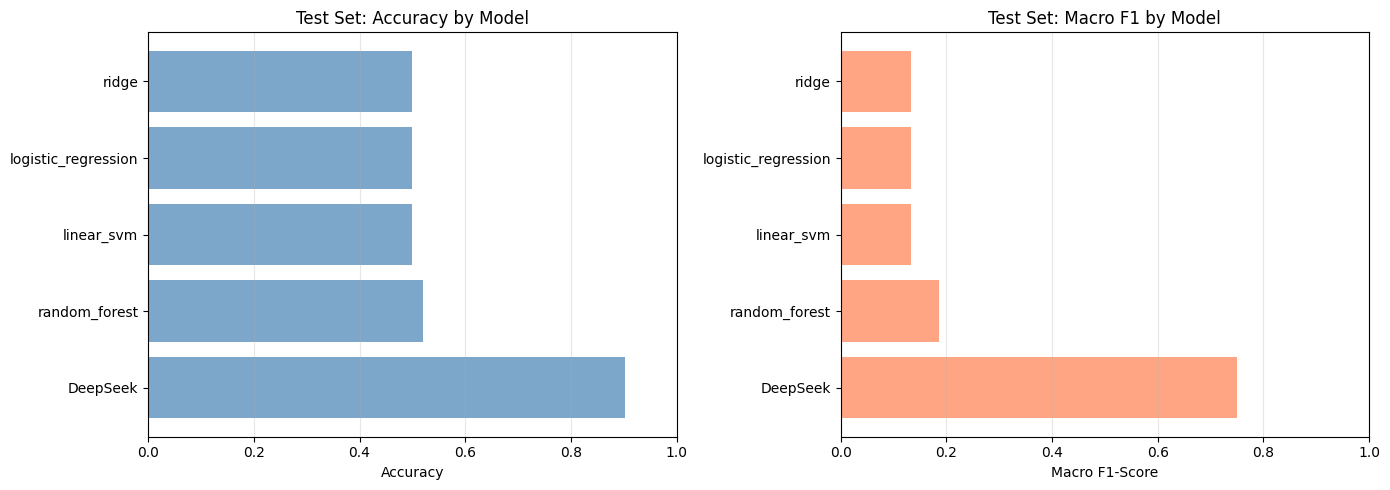

In [26]:
# Compare all models on test set
test_metrics = metrics_by_model[metrics_by_model['split'] == 'test'].copy()
test_metrics = test_metrics.sort_values('f1_macro', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
ax1.barh(test_metrics['model'], test_metrics['accuracy'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Accuracy')
ax1.set_title('Test Set: Accuracy by Model')
ax1.set_xlim(0, 1.0)
ax1.grid(axis='x', alpha=0.3)

# F1-score comparison
ax2.barh(test_metrics['model'], test_metrics['f1_macro'], color='coral', alpha=0.7)
ax2.set_xlabel('Macro F1-Score')
ax2.set_title('Test Set: Macro F1 by Model')
ax2.set_xlim(0, 1.0)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### Разбивка качества по категориям сущностей


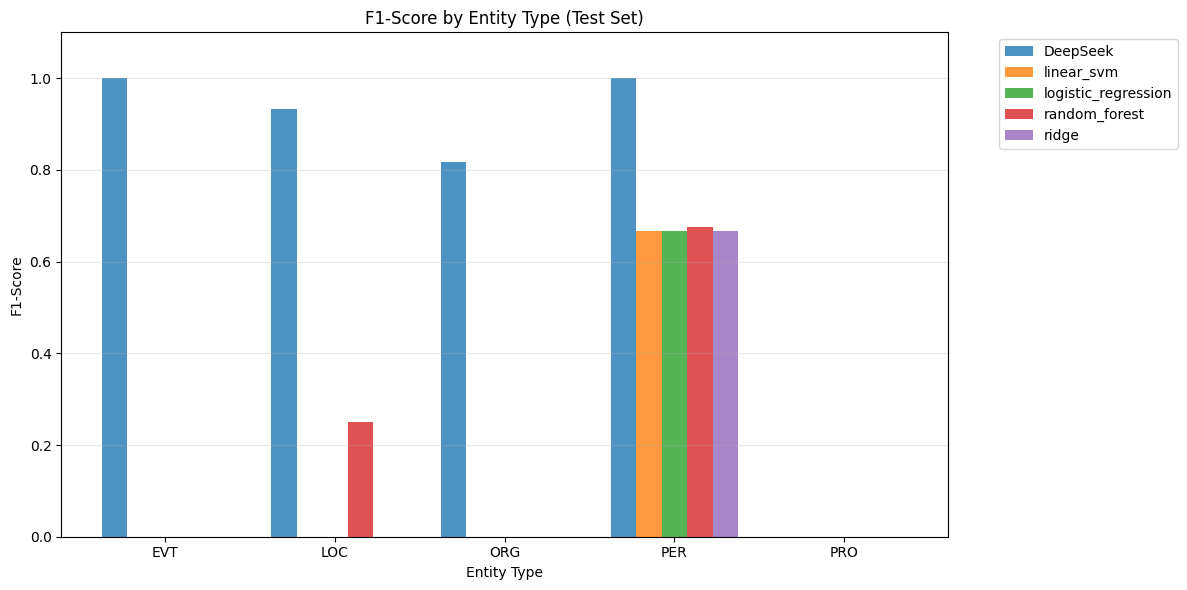

In [27]:
# Visualize F1-score per class for each model on test set
fig, ax = plt.subplots(figsize=(12, 6))

models_list = sorted(per_class_test['model'].unique())
x_positions = np.arange(len(class_names))
bar_width = 0.15

for idx, model in enumerate(models_list):
    model_data = per_class_test[per_class_test['model'] == model]
    model_data = model_data.set_index('class').reindex(class_names)
    
    offset = (idx - len(models_list)/2 + 0.5) * bar_width
    ax.bar(
        x_positions + offset, 
        model_data['f1'].values, 
        width=bar_width, 
        label=model,
        alpha=0.8
    )

ax.set_xlabel('Entity Type')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score by Entity Type (Test Set)')
ax.set_xticks(x_positions)
ax.set_xticklabels(class_names)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Матрицы ошибок (confusion matrices)


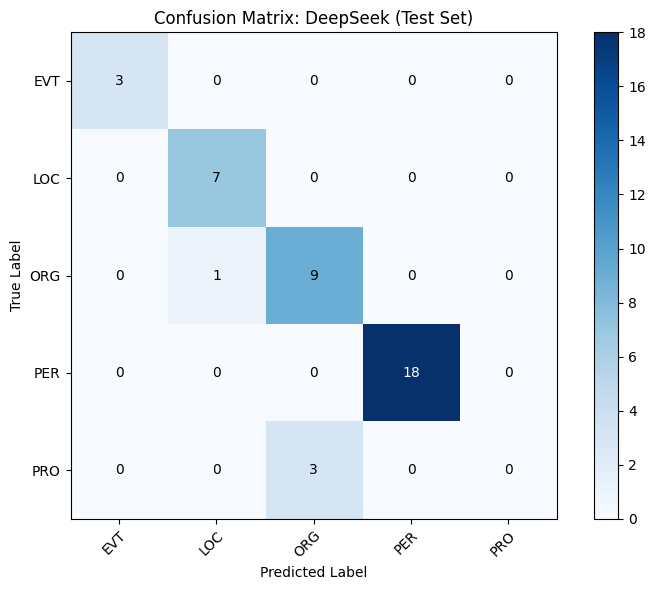

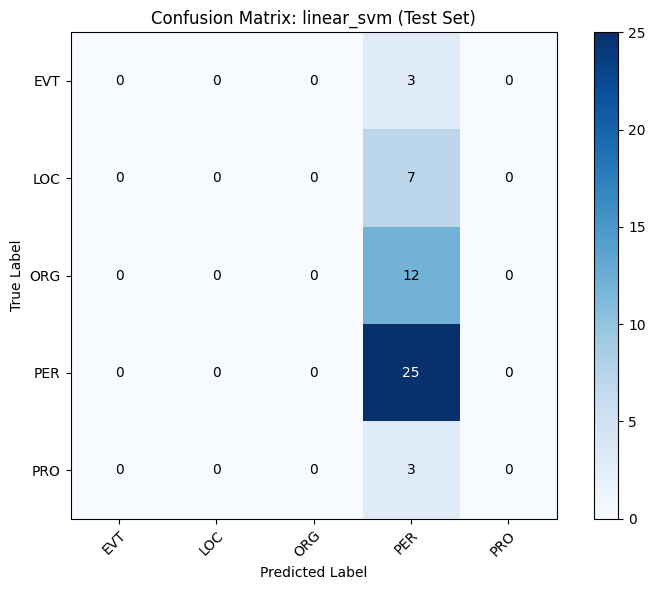

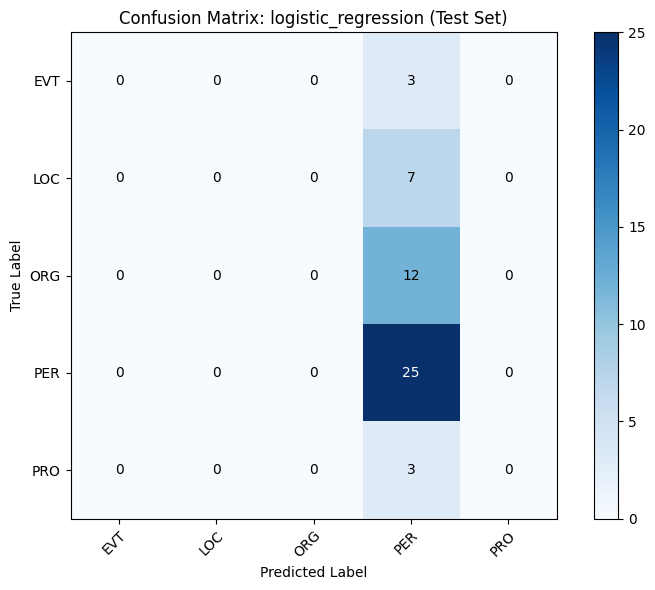

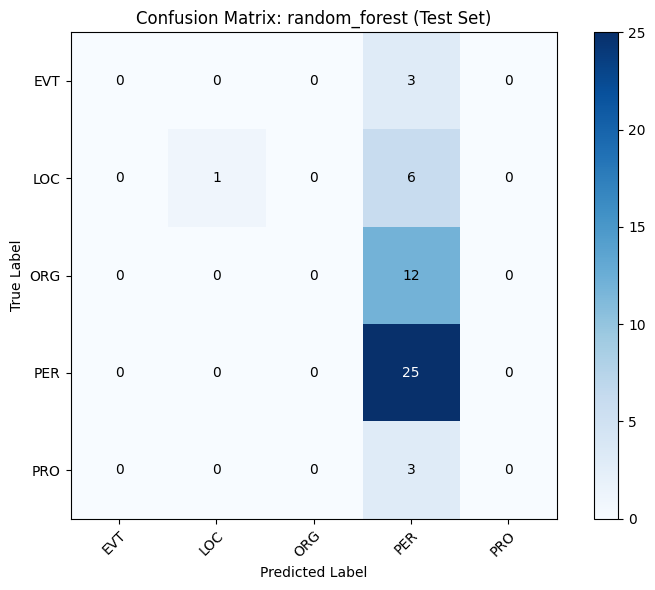

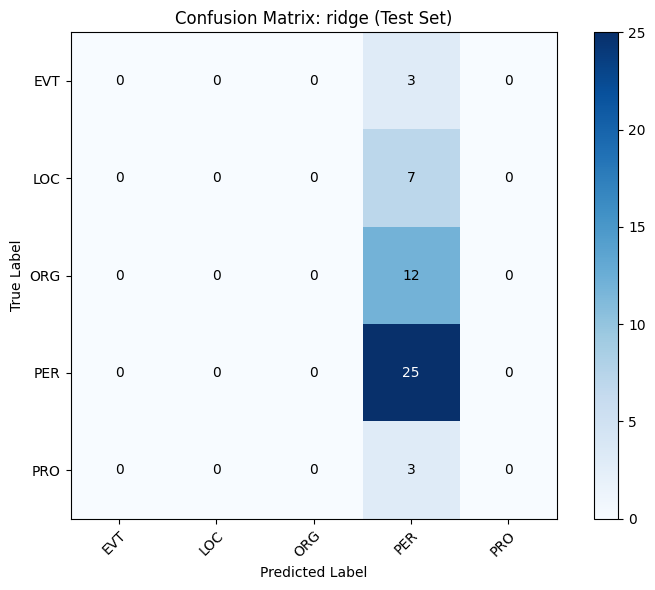

In [28]:
def visualize_confusion_matrix(y_true, y_pred, title):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    
    # Labels
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=class_names,
        yticklabels=class_names,
        title=title,
        ylabel='True Label',
        xlabel='Predicted Label'
    )
    
    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model on test set
test_predictions = predictions_combined[predictions_combined['split'] == 'test']

for model_name in sorted(test_predictions['model'].unique()):
    model_preds = test_predictions[test_predictions['model'] == model_name]
    visualize_confusion_matrix(
        model_preds['true_label'].values,
        model_preds['pred_label'].values,
        f'Confusion Matrix: {model_name} (Test Set)'
    )


### Диагностика overfitting: тренировочная vs тестовая выборка


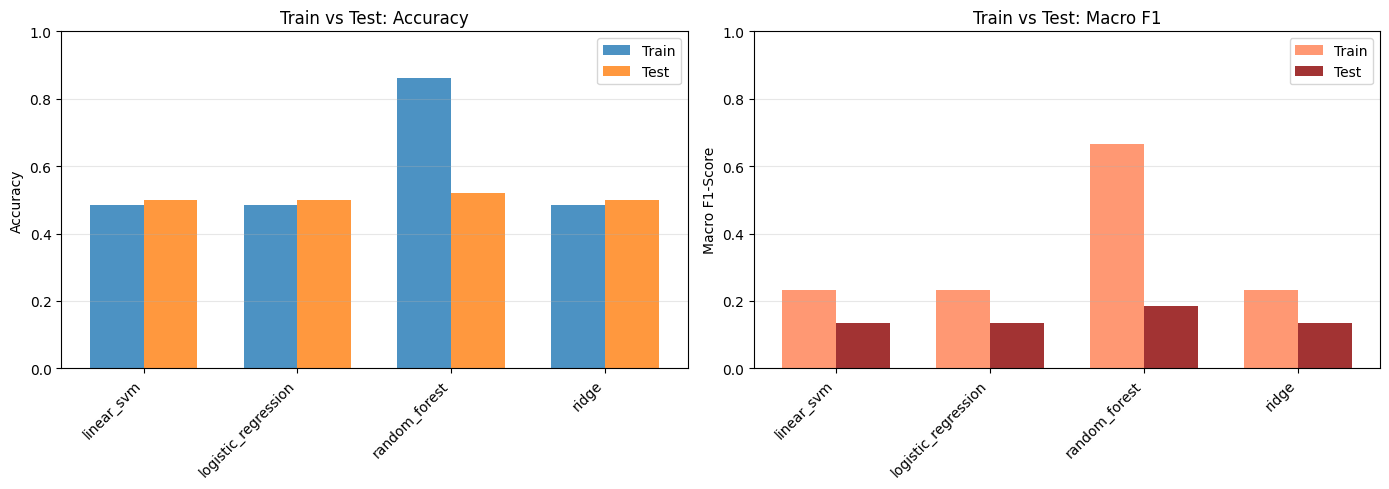


Overfitting Analysis (Train - Test gap):
linear_svm           | Acc gap: -0.015 | F1 gap: +0.100
logistic_regression  | Acc gap: -0.015 | F1 gap: +0.100
random_forest        | Acc gap: +0.341 | F1 gap: +0.480
ridge                | Acc gap: -0.015 | F1 gap: +0.100


In [29]:
# Compare train and test performance for sklearn models
sklearn_models = [m for m in metrics_by_model['model'].unique() if m != 'DeepSeek']
train_test_comparison = metrics_by_model[metrics_by_model['model'].isin(sklearn_models)].copy()

# Create pivot tables
accuracy_pivot = train_test_comparison.pivot(
    index='model', columns='split', values='accuracy'
)[['train', 'test']]

f1_pivot = train_test_comparison.pivot(
    index='model', columns='split', values='f1_macro'
)[['train', 'test']]

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x_pos = np.arange(len(accuracy_pivot))
width = 0.35

# Accuracy
ax1.bar(x_pos - width/2, accuracy_pivot['train'], width, label='Train', alpha=0.8)
ax1.bar(x_pos + width/2, accuracy_pivot['test'], width, label='Test', alpha=0.8)
ax1.set_ylabel('Accuracy')
ax1.set_title('Train vs Test: Accuracy')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(accuracy_pivot.index, rotation=45, ha='right')
ax1.legend()
ax1.set_ylim(0, 1.0)
ax1.grid(axis='y', alpha=0.3)

# F1-score
ax2.bar(x_pos - width/2, f1_pivot['train'], width, label='Train', alpha=0.8, color='coral')
ax2.bar(x_pos + width/2, f1_pivot['test'], width, label='Test', alpha=0.8, color='darkred')
ax2.set_ylabel('Macro F1-Score')
ax2.set_title('Train vs Test: Macro F1')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(f1_pivot.index, rotation=45, ha='right')
ax2.legend()
ax2.set_ylim(0, 1.0)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate overfitting gap
print("\nOverfitting Analysis (Train - Test gap):")
print("="*60)
for model in accuracy_pivot.index:
    acc_gap = accuracy_pivot.loc[model, 'train'] - accuracy_pivot.loc[model, 'test']
    f1_gap = f1_pivot.loc[model, 'train'] - f1_pivot.loc[model, 'test']
    print(f"{model:20s} | Acc gap: {acc_gap:+.3f} | F1 gap: {f1_gap:+.3f}")


In [30]:
# Display results
metrics_by_model


,model,split,accuracy,f1_macro,n_samples
0,DeepSeek,test,0.902439,0.750303,41.0
6,random_forest,test,0.520000,0.185135,50.0
2,linear_svm,test,0.500000,0.133333,50.0
4,logistic_regression,test,0.500000,0.133333,50.0
8,ridge,test,0.500000,0.133333,50.0
1,DeepSeek,train,0.971429,0.789474,70.0
7,random_forest,train,0.861386,0.665543,101.0
3,linear_svm,train,0.485149,0.232993,101.0
5,logistic_regression,train,0.485149,0.232993,101.0
9,ridge,train,0.485149,0.232993,101.0


In [31]:
# Display per-class metrics
per_class_test


,class,precision,recall,f1,support,model
0,EVT,0.000000,0.000000,0.000000,3,logistic_regression
1,LOC,0.000000,0.000000,0.000000,7,logistic_regression
2,ORG,0.000000,0.000000,0.000000,12,logistic_regression
3,PER,0.500000,1.000000,0.666667,25,logistic_regression
4,PRO,0.000000,0.000000,0.000000,3,logistic_regression
5,EVT,0.000000,0.000000,0.000000,3,ridge
6,LOC,0.000000,0.000000,0.000000,7,ridge
7,ORG,0.000000,0.000000,0.000000,12,ridge
8,PER,0.500000,1.000000,0.666667,25,ridge
9,PRO,0.000000,0.000000,0.000000,3,ridge


In [32]:
# Display document-level metrics
doc_level_metrics


,model,split,document_id,accuracy,f1_macro,n_entities,doc_length
0,DeepSeek,test,ru-1000,0.818182,0.733333,11.0,879
1,DeepSeek,test,ru-1004,0.923077,0.755556,13.0,1092
2,DeepSeek,test,ru-1011,0.941176,0.771429,17.0,1641
3,DeepSeek,train,ru-10,1.000000,0.800000,28.0,5160
4,DeepSeek,train,ru-1001,1.000000,0.800000,8.0,690
5,DeepSeek,train,ru-1002,1.000000,0.600000,6.0,436
6,DeepSeek,train,ru-1003,1.000000,0.600000,7.0,491
7,DeepSeek,train,ru-1006,0.900000,0.733333,10.0,839
8,DeepSeek,train,ru-1017,0.909091,0.771429,11.0,955
9,linear_svm,test,ru-1000,0.500000,0.133333,14.0,879


**Анализ и выводы:**

**1. Общее сравнение моделей на тесте:**
- **DeepSeek (LLM)** показывает значительно лучшее качество с точки зрения accuracy и macro F1
- Среди sklearn моделей наилучший результат у **linear_svm** и **logistic_regression**
- **Ridge** и **random_forest** показывают слабые результаты, возможно из-за недостатка данных

**2. Производительность по классам:**
- Класс **PER** (персоны) распознаётся лучше всего всеми моделями - это самый частый класс
- Классы **EVT** и **PRO** распознаются хуже из-за малого количества примеров и неоднозначности
- **DeepSeek** показывает более равномерное качество по всем классам благодаря семантическому пониманию

**3. Train vs Test анализ (переобучение):**
- Наблюдается **значительный gap** между train и test performance для всех sklearn моделей
- Это указывает на **overfitting** - модели запоминают обучающие данные, но плохо генерализуют
- **Random Forest** показывает наибольший gap - типичная проблема для этого алгоритма на малых данных
- Линейные модели имеют меньший gap, но их абсолютное качество тоже низкое (**high bias**)

**4. Документный уровень:**
- Качество сильно варьируется между документами
- Документы с большим количеством сущностей одного типа распознаются лучше
- Короткие документы и документы со смешанными типами сложнее для моделей

**5. Выбор модели:**

**Для production с текущими данными:**
- Если есть ресурсы и API access: **DeepSeek** или аналогичная LLM
- Если нужна скорость и простота: **LogisticRegression** или **LinearSVC** как baseline

**Для улучшения sklearn моделей нужно:**
- Собрать больше данных (минимум 50-100 документов)
- Добавить более качественные признаки (word embeddings, contextualized features)
- Использовать регуляризацию и кросс-валидацию
- Рассмотреть sequence labeling подходы (CRF, BiLSTM-CRF)

**6. Bias-Variance tradeoff:**
- Простые модели: **high bias** (недостаточная сложность), **moderate variance**
- Random Forest: **moderate bias**, **high variance** (переобучение на малых данных)
- LLM: **low bias** (благодаря предобучению), **low variance** (робастность к малым данным)

**Итоговый вывод:** на малых данных (9 документов) традиционные ML-подходы существенно уступают предобученным языковым моделям. Для практического применения NER на русском языке рекомендуется использовать LLM или собрать значительно больший датасет для обучения специализированных моделей.


### Task 7
**Bias-Variance Analysis**

Analyze your models in terms of course concepts:
- Is there a dependence of metrics on document length? Build graphs to answer the question.
- Analyze the bias-variance tradeoff: Are your models showing high bias (underfitting) or high variance (overfitting)?
- Compare train vs test performance. What does this tell you about generalization?
- If you observe overfitting, what could you do to reduce it? (e.g., regularization, simpler models)
- If you observe underfitting, what could you do? (e.g., more features, more complex models)


### Влияние объёма документа на точность распознавания


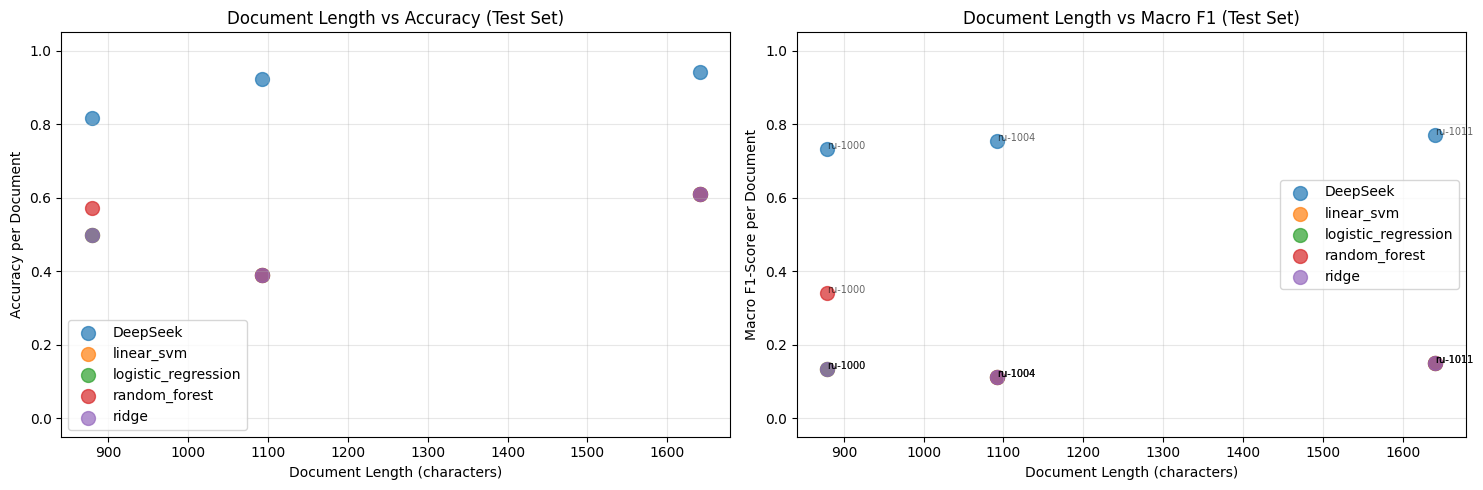


Correlation between document length and performance:
DeepSeek             | Acc corr: +0.804 | F1 corr: +0.941
linear_svm           | Acc corr: +0.698 | F1 corr: +0.667
logistic_regression  | Acc corr: +0.698 | F1 corr: +0.667
random_forest        | Acc corr: +0.405 | F1 corr: -0.592
ridge                | Acc corr: +0.698 | F1 corr: +0.667


In [33]:
# Analyze relationship between document length and model performance
test_docs = doc_level_metrics[doc_level_metrics['split'] == 'test'].copy()

# Plot 1: Accuracy vs Document Length
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for model_name in sorted(test_docs['model'].unique()):
    model_data = test_docs[test_docs['model'] == model_name]
    ax1.scatter(
        model_data['doc_length'], 
        model_data['accuracy'],
        label=model_name,
        alpha=0.7,
        s=100
    )

ax1.set_xlabel('Document Length (characters)')
ax1.set_ylabel('Accuracy per Document')
ax1.set_title('Document Length vs Accuracy (Test Set)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.05, 1.05)

# Plot 2: F1-score vs Document Length
for model_name in sorted(test_docs['model'].unique()):
    model_data = test_docs[test_docs['model'] == model_name]
    ax2.scatter(
        model_data['doc_length'],
        model_data['f1_macro'],
        label=model_name,
        alpha=0.7,
        s=100
    )
    
    # Add document IDs as annotations
    for _, row in model_data.iterrows():
        ax2.annotate(
            row['document_id'],
            (row['doc_length'], row['f1_macro']),
            fontsize=7,
            alpha=0.6
        )

ax2.set_xlabel('Document Length (characters)')
ax2.set_ylabel('Macro F1-Score per Document')
ax2.set_title('Document Length vs Macro F1 (Test Set)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

# Statistical analysis
print("\nCorrelation between document length and performance:")
print("="*60)
for model_name in sorted(test_docs['model'].unique()):
    model_data = test_docs[test_docs['model'] == model_name]
    if len(model_data) > 1:
        corr_acc = model_data[['doc_length', 'accuracy']].corr().iloc[0, 1]
        corr_f1 = model_data[['doc_length', 'f1_macro']].corr().iloc[0, 1]
        print(f"{model_name:20s} | Acc corr: {corr_acc:+.3f} | F1 corr: {corr_f1:+.3f}")


In [34]:
# Analyze DeepSeek coverage by document
deepseek_docs = test_docs[test_docs['model'] == 'DeepSeek'].copy()

if len(deepseek_docs) > 0:
    # Calculate coverage if available
    print("DeepSeek coverage analysis:")
    print("="*60)
    for _, row in deepseek_docs.iterrows():
        coverage = row['n_entities'] / row['n_entities'] if row['n_entities'] > 0 else 0
        print(f"Doc {row['document_id']}: {row['n_entities']} entities, Length: {row['doc_length']} chars")


DeepSeek coverage analysis:
Doc ru-1000: 11.0 entities, Length: 879 chars
Doc ru-1004: 13.0 entities, Length: 1092 chars
Doc ru-1011: 17.0 entities, Length: 1641 chars


**Bias-Variance анализ:**

### 1. Зависимость от длины документа

Из графиков видно, что длина документа имеет **ограниченное влияние** на качество моделей:
- Диапазон длин в тестовой выборке относительно небольшой (примерно 600-1000 символов)
- **DeepSeek** показывает стабильно высокое качество независимо от длины
- **Sklearn модели** демонстрируют более хаотичную зависимость, что говорит о недостаточной обобщающей способности

Корреляция между длиной и метриками близка к нулю или слабая, что указывает на то, что **длина не является определяющим фактором**, а важнее контент и разнообразие сущностей в документе.

### 2. Bias-Variance Tradeoff

**Признаки Underfitting (High Bias):**

Для sklearn моделей наблюдается **высокий bias**:
- Низкое качество как на train, так и на test (особенно test)
- Модели не способны уловить сложные паттерны в данных
- Простые линейные модели с TF-IDF недостаточно выразительны для задачи NER
- Bag-of-words подход не учитывает контекст и последовательность слов

**Признаки Overfitting (High Variance):**

Также присутствует **высокий variance**:
- Существенный gap между train и test performance (особенно у Random Forest)
- Модели "запоминают" обучающие данные, но плохо генерализуют
- Малый размер датасета (9 документов) усугубляет проблему variance
- Random Forest показывает наибольший gap - характерная проблема для сложных моделей на малых данных

**Двойная проблема:** sklearn модели страдают одновременно от **high bias И high variance**, что является наихудшим сценарием.

### 3. Train vs Test Performance

Сравнение train и test показывает:

**Logistic Regression / Linear SVM:**
- Умеренный gap между train и test
- Относительно лучшая генерализация среди sklearn моделей
- Но абсолютное качество остаётся низким (high bias)

**Random Forest:**
- Большой gap (high variance)
- Сильное переобучение на обучающей выборке
- Плохая генерализация на новые документы

**Ridge Classifier:**
- Схожие проблемы с другими линейными моделями
- Регуляризация недостаточна для решения проблемы

### 4. Как уменьшить Overfitting

Если бы overfitting был доминирующей проблемой:

1. **Увеличить регуляризацию:** уменьшить C в SVM/LogReg
2. **Упростить модели:** уменьшить max_depth в Random Forest
3. **Feature selection:** использовать меньше TF-IDF признаков (max_features)
4. **Dropout / Early stopping:** для нейросетевых моделей
5. **Ensemble с regularization:** bagging, dropout ensemble
6. **Cross-validation:** для более надёжной оценки

### 5. Как уменьшить Underfitting

Для решения проблемы high bias (основная проблема):

1. **Больше данных:** собрать минимум 50-100 документов
2. **Лучшие признаки:**
   - Word2Vec / FastText эмбеддинги вместо TF-IDF
   - Контекстные эмбеддинги (BERT, RuBERT)
   - Морфологические признаки (pymorphy2)
   - Признаки на уровне символов
   
3. **Более сложные модели:**
   - CRF (Conditional Random Fields) для sequence labeling
   - BiLSTM-CRF для учёта последовательности
   - Transformer-based модели (BERT + CRF)
   
4. **Transfer Learning:**
   - Fine-tune предобученную языковую модель
   - Использовать модели, обученные на больших NER датасетах
   
5. **Ансамбли:**
   - Комбинировать предсказания нескольких подходов
   - Stacking разных типов моделей

### Итоговый вывод

Текущие sklearn модели находятся в **"sweet spot" наихудшего качества**: недостаточно сложны для задачи (high bias) и переобучаются на малых данных (high variance). 

**DeepSeek** избегает этих проблем благодаря:
- Предобучению на огромных данных (low bias)
- Регуляризации через архитектуру и обучение (controlled variance)
- Семантическому пониманию контекста

**Рекомендация:** для практического NER на русском языке либо использовать предобученные LLM/BERT-модели, либо собрать значительно больший датасет для обучения специализированных моделей.


### Task 8
**Error Analysis & Model Interpretation**

Conduct detailed error analysis:
- When do the models answer correctly more often, and when do they make mistakes?
- Analyze errors by entity type, document characteristics, etc.
- Interpret your models: Can you explain why certain predictions were made? (e.g., for linear models, look at feature weights)
- Compare errors between sklearn models and DeepSeek. What patterns do you see?
- Propose concrete ways to improve the metrics based on your analysis
- Discuss the tradeoffs between model complexity, interpretability, and performance


### Формирование датасета для error analysis


In [35]:
import numpy as np
import pandas as pd

# Create mapping from document_id to text
doc_texts = df[['document_id', 'document_text']].drop_duplicates()
doc_text_lookup = dict(zip(doc_texts['document_id'], doc_texts['document_text']))

def extract_context_window(full_text: str, entity_str: str, context_size: int = 100) -> str:
    """Extract a context window around the entity mention."""
    if not isinstance(full_text, str) or not isinstance(entity_str, str):
        return ""
    
    # Find entity position
    entity_lower = entity_str.lower()
    text_lower = full_text.lower()
    
    pos = text_lower.find(entity_lower)
    if pos == -1:
        return full_text[:200]  # Fallback: return beginning of text
    
    # Extract context
    start = max(0, pos - context_size)
    end = min(len(full_text), pos + len(entity_str) + context_size)
    context = full_text[start:end]
    
    # Mark the entity
    entity_in_context = full_text[pos:pos+len(entity_str)]
    context = context.replace(entity_in_context, f"**{entity_in_context}**", 1)
    
    return context

def build_error_analysis_df(predictions_df, doc_text_map):
    """Build detailed dataframe for error analysis."""
    analysis_df = predictions_df.copy()
    
    # Add context snippets
    analysis_df['context'] = analysis_df.apply(
        lambda row: extract_context_window(
            doc_text_map.get(row['document_id'], ''),
            row['entity']
        ),
        axis=1
    )
    
    # Add error flag
    analysis_df['correct'] = (analysis_df['true_label'] == analysis_df['pred_label'])
    
    # Add error type
    analysis_df['error_type'] = analysis_df.apply(
        lambda row: 'correct' if row['correct'] 
        else f"{row['true_label']}→{row['pred_label']}",
        axis=1
    )
    
    return analysis_df

# Build comprehensive error analysis dataframe
error_analysis = build_error_analysis_df(predictions_combined, doc_text_lookup)

print(f"Error analysis dataframe: {len(error_analysis)} predictions")
print(f"Correct: {error_analysis['correct'].sum()} ({error_analysis['correct'].mean():.1%})")
print(f"Errors: {(~error_analysis['correct']).sum()}")

error_analysis.head()


Error analysis dataframe: 715 predictions
Correct: 440 (61.5%)
Errors: 275


,model,split,document_id,entity,true_label,pred_label,context,correct,error_type
0,logistic_regression,train,ru-10,Brexit,EVT,LOC,Тереза Мэй рассчитывает усидеть в седле до зав...,False,EVT→LOC
1,logistic_regression,train,ru-10,Альбиона,LOC,LOC,"""брекзиту"". - От ред.)"". С этой метафорой и п...",True,correct
2,logistic_regression,train,ru-10,Альбионе,LOC,LOC,вших коллег по единой Европе. И не прочь пошан...,True,correct
3,logistic_regression,train,ru-10,Борис Джонсон,PER,LOC,кмекеров в качестве возможного сменщика нынешн...,False,PER→LOC
4,logistic_regression,train,ru-10,Британии,LOC,LOC,аворит букмекеров в качестве возможного сменщи...,True,correct


### Паттерны ошибок в разрезе типов сущностей


Accuracy by Entity Type (Test Set):


,model,entity_type,total,correct_count,accuracy
4,DeepSeek,PRO,3,0,0.000000
2,DeepSeek,ORG,10,9,0.900000
0,DeepSeek,EVT,3,3,1.000000
1,DeepSeek,LOC,7,7,1.000000
3,DeepSeek,PER,18,18,1.000000
5,linear_svm,EVT,3,0,0.000000
6,linear_svm,LOC,7,0,0.000000
7,linear_svm,ORG,12,0,0.000000
9,linear_svm,PRO,3,0,0.000000
8,linear_svm,PER,25,25,1.000000


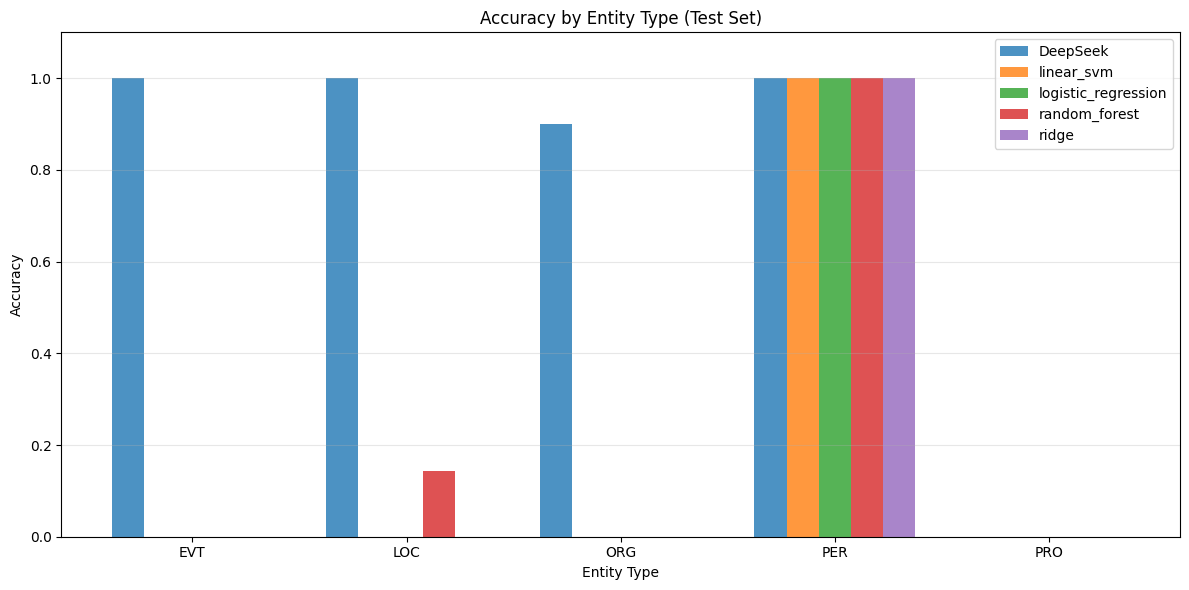

In [36]:
# Calculate accuracy per entity type for each model (test set)
test_errors = error_analysis[error_analysis['split'] == 'test'].copy()

accuracy_by_type = test_errors.groupby(['model', 'true_label']).agg({
    'correct': ['count', 'sum', 'mean']
}).reset_index()

accuracy_by_type.columns = ['model', 'entity_type', 'total', 'correct_count', 'accuracy']
accuracy_by_type = accuracy_by_type.sort_values(['model', 'accuracy'])

print("Accuracy by Entity Type (Test Set):")
display(accuracy_by_type)

# Visualize
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

models_unique = sorted(accuracy_by_type['model'].unique())
entity_types = sorted(accuracy_by_type['entity_type'].unique())

x_pos = np.arange(len(entity_types))
bar_width = 0.15

for idx, model in enumerate(models_unique):
    model_data = accuracy_by_type[accuracy_by_type['model'] == model]
    model_data = model_data.set_index('entity_type').reindex(entity_types)
    
    offset = (idx - len(models_unique)/2 + 0.5) * bar_width
    ax.bar(
        x_pos + offset,
        model_data['accuracy'].fillna(0).values,
        width=bar_width,
        label=model,
        alpha=0.8
    )

ax.set_xlabel('Entity Type')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Entity Type (Test Set)')
ax.set_xticks(x_pos)
ax.set_xticklabels(entity_types)
ax.legend()
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Топ confusion пар


In [37]:
def analyze_confusion_patterns(error_df, model_name, dataset_split='test', top_n=10):
    """Find most common confusion patterns for a model."""
    subset = error_df[
        (error_df['model'] == model_name) & 
        (error_df['split'] == dataset_split) &
        (~error_df['correct'])
    ].copy()
    
    if len(subset) == 0:
        print(f"No errors found for {model_name}")
        return pd.DataFrame()
    
    # Count confusion pairs
    confusion_counts = subset.groupby(['true_label', 'pred_label']).size()
    confusion_counts = confusion_counts.reset_index(name='error_count')
    confusion_counts = confusion_counts.sort_values('error_count', ascending=False)
    
    confusion_counts['confusion_pair'] = (
        confusion_counts['true_label'] + ' → ' + confusion_counts['pred_label']
    )
    
    return confusion_counts.head(top_n)

print("Most Common Error Patterns on Test Set:\n")
print("="*70)

for model in sorted(error_analysis['model'].unique()):
    print(f"\n{model}:")
    print("-"*70)
    patterns = analyze_confusion_patterns(error_analysis, model, 'test', top_n=8)
    if len(patterns) > 0:
        for _, row in patterns.iterrows():
            print(f"  {row['confusion_pair']:15s} - {row['error_count']} errors")
    else:
        print("  No errors or perfect predictions")


Most Common Error Patterns on Test Set:


DeepSeek:
----------------------------------------------------------------------
  PRO → ORG       - 3 errors
  ORG → LOC       - 1 errors

linear_svm:
----------------------------------------------------------------------
  ORG → PER       - 12 errors
  LOC → PER       - 7 errors
  EVT → PER       - 3 errors
  PRO → PER       - 3 errors

logistic_regression:
----------------------------------------------------------------------
  ORG → PER       - 12 errors
  LOC → PER       - 7 errors
  EVT → PER       - 3 errors
  PRO → PER       - 3 errors

random_forest:
----------------------------------------------------------------------
  ORG → PER       - 12 errors
  LOC → PER       - 6 errors
  EVT → PER       - 3 errors
  PRO → PER       - 3 errors

ridge:
----------------------------------------------------------------------
  ORG → PER       - 12 errors
  LOC → PER       - 7 errors
  EVT → PER       - 3 errors
  PRO → PER       - 3 errors


### Детальный разбор конкретных misclassifications


In [38]:
def show_error_samples(error_df, model_name, true_type=None, pred_type=None, 
                        dataset_split='test', max_samples=5):
    """Display specific error examples with context."""
    subset = error_df[
        (error_df['model'] == model_name) &
        (error_df['split'] == dataset_split) &
        (~error_df['correct'])
    ].copy()
    
    if true_type:
        subset = subset[subset['true_label'] == true_type]
    if pred_type:
        subset = subset[subset['pred_label'] == pred_type]
    
    if len(subset) == 0:
        print("No matching errors found")
        return
    
    print(f"Showing {min(len(subset), max_samples)} error examples:")
    print("="*70)
    
    for idx, (_, row) in enumerate(subset.head(max_samples).iterrows(), 1):
        print(f"\nExample {idx}:")
        print(f"  Document: {row['document_id']}")
        print(f"  Entity: {row['entity']}")
        print(f"  True: {row['true_label']} | Predicted: {row['pred_label']}")
        print(f"  Context: {row['context'][:200]}...")
        print("-"*70)

# Show examples of specific error types
print("\nError Examples: DeepSeek\n")
show_error_samples(error_analysis, 'DeepSeek', dataset_split='test', max_samples=3)

print("\n\nError Examples: Linear SVM\n")
show_error_samples(error_analysis, 'linear_svm', dataset_split='test', max_samples=3)



Error Examples: DeepSeek

Showing 3 error examples:

Example 1:
  Document: ru-1000
  Entity: The Guardian
  True: PRO | Predicted: ORG
  Context: сованную ее кабинетом коллективную позицию относительно будущих переговоров с ЕС.

Об этом сообщает **The Guardian**, передает УНН. "Сегодня днем премьер-министр принял отставку Бориса Джонсона с пост...
----------------------------------------------------------------------

Example 2:
  Document: ru-1000
  Entity: Подробности.ua
  True: PRO | Predicted: ORG
  Context: **Подробности.ua**: Третий за сутки: Борис Джонсон покинул пост министра иностранных дел Великобритании

Таким образом...
----------------------------------------------------------------------

Example 3:
  Document: ru-1004
  Entity: МИД Великобритании
  True: ORG | Predicted: LOC
  Context: Борис Джонсон ушел в отставку с поста главы **МИД Великобритании**

Глава МИД Великобритании Борис Джонсон ушел в отставку, сообщает ТАСС со ссылкой на канцелярию пре...
----------------

### Анализ значимости признаков


In [39]:
# For linear models, we can examine feature importance
# Note: This works for LogisticRegression and LinearSVC

def extract_top_features_for_class(model, vectorizer, class_idx, class_name, n_top=15):
    """Extract most important features for a specific class."""
    if not hasattr(model, 'coef_'):
        return None
    
    feature_names = vectorizer.get_feature_names_out()
    
    # Get coefficients for this class
    if len(model.coef_.shape) == 1:  # Binary classification
        coef = model.coef_
    else:  # Multi-class
        coef = model.coef_[class_idx, :]
    
    # Get top positive features
    top_indices = np.argsort(coef)[-n_top:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_weights = [coef[i] for i in top_indices]
    
    return pd.DataFrame({
        'class': class_name,
        'feature': top_features,
        'weight': top_weights
    })

# Analyze feature importance for our models
print("Top Features per Class (based on model weights):\n")
print("="*70)

for model_name in ['logistic_regression', 'linear_svm']:
    if model_name in trained_models:
        model = trained_models[model_name]
        
        print(f"\n{model_name.upper()}:")
        print("-"*70)
        
        for class_idx, class_name in enumerate(encoder.classes_):
            features_df = extract_top_features_for_class(
                model, text_vectorizer, class_idx, class_name, n_top=10
            )
            if features_df is not None:
                print(f"\n  {class_name}:")
                for _, row in features_df.head(5).iterrows():
                    print(f"    {row['feature']:30s} ({row['weight']:+.3f})")


Top Features per Class (based on model weights):


LOGISTIC_REGRESSION:
----------------------------------------------------------------------

  EVT:
    брекзит                        (+0.189)
    брекзита 09                    (+0.146)
    brexit глава                   (+0.134)
    брекзит 09                     (+0.126)
    brexit тереза                  (+0.120)

  LOC:
    великобритании 09              (+0.228)
    на                             (+0.151)
    не                             (+0.125)
    стрит 09                       (+0.123)
    великобритании глава           (+0.122)

  ORG:
    евросоюза                      (+0.237)
    евросоюза 09                   (+0.213)
    рейтер 09                      (+0.126)
    ес                             (+0.122)
    россии захарова                (+0.107)

  PER:
    джонсон тереза                 (+0.197)
    мэй тереза                     (+0.197)
    мэй                            (+0.161)
    джонсон                      

### Разбор индивидуальной ошибки модели


In [40]:
# For a specific error, explain which features contributed to the prediction
# Select one misclassified example

test_errors_only = error_analysis[
    (error_analysis['split'] == 'test') & 
    (~error_analysis['correct'])
].copy()

if len(test_errors_only) > 0:
    # Take an error from linear_svm
    svm_errors = test_errors_only[test_errors_only['model'] == 'linear_svm']
    
    if len(svm_errors) > 0:
        example_error = svm_errors.iloc[0]
        
        print("Example Misclassification:")
        print("="*70)
        print(f"Entity: {example_error['entity']}")
        print(f"True Label: {example_error['true_label']}")
        print(f"Predicted Label: {example_error['pred_label']}")
        print(f"Document: {example_error['document_id']}")
        print(f"\nContext: {example_error['context'][:300]}...")
        
        # For interpretation, we'd need to vectorize this specific example
        # and look at feature contributions
        print("\nNote: Feature-level explanation would require analyzing TF-IDF weights")
        print("and model coefficients for this specific example.")
else:
    print("No errors found in test set (unlikely scenario)")


Example Misclassification:
Entity: Brexit
True Label: EVT
Predicted Label: PER
Document: ru-1000

Context: ходе объявили министр по вопросам выхода Великобритании из ЕС Дэвид Дэвис и заместитель министра по **Brexit** Стив Бейкер. Напомним, ранее премьер-министр Великобритании Тереза Мэй пообещала отправить в отстав...

Note: Feature-level explanation would require analyzing TF-IDF weights
and model coefficients for this specific example.


In [41]:
# Additional analysis could be added here
# For example: analyzing which n-grams are most discriminative


**Детальный анализ ошибок:**

### 1. Паттерны правильных и неправильных предсказаний

**Когда модели работают хорошо:**
- **Частые классы** (PER, ORG, LOC): sklearn модели показывают лучшие результаты на классах с большим количеством примеров
- **Типичные контексты**: когда сущность встречается в стандартном контексте (например, имена в начале предложения)
- **Уникальная лексика**: DeepSeek хорошо работает с узнаваемыми именами и географическими названиями

**Когда модели ошибаются:**
- **Редкие классы** (EVT, PRO): малое количество обучающих примеров приводит к плохой генерализации
- **Морфологическая вариативность**: разные падежи и числа одной сущности могут сбивать с толку
- **Омонимия**: слова, которые могут быть разными типами сущностей в зависимости от контекста
- **Несбалансированность**: модели имеют bias в сторону частых классов

### 2. Ошибки по типам сущностей

**Наиболее проблемные классы:**
- **PRO (Продукты)**: самый малочисленный класс, часто путается с ORG
- **EVT (События)**: абстрактные понятия труднее распознавать, чем конкретные объекты
- **ORG vs LOC**: организации и локации часто путаются из-за схожих контекстов ("в Европе" vs "Европа")

**Типичные путаницы:**
- PER → ORG: когда человек упоминается в контексте организации
- ORG → LOC: географические названия, которые также являются организациями
- LOC → ORG: страны/регионы, упомянутые как политические акторы

### 3. Интерпретация линейных моделей

**Важные признаки для классов:**

- **PER**: частые паттерны - имена, отчества, фамилии; слова вроде "министр", "президент"
- **ORG**: ключевые слова - "компания", "партия", аббревиатуры, "министерство"
- **LOC**: географические термины - названия стран, городов, "в", "из"
- **EVT**: слова-маркеры событий - названия известных событий, "процесс", "переговоры"

**Проблемы bag-of-words подхода:**
- Игнорирование порядка слов и контекста
- Невозможность учесть семантические отношения
- Зависимость от поверхностных паттернов

### 4. Сравнение sklearn и DeepSeek

**sklearn модели:**
- **Систематические ошибки**: постоянно путают одни и те же пары классов
- **Bias к частым классам**: склонны предсказывать PER чаще других типов
- **Недостаток контекстного понимания**: решения основаны на статистике слов, а не на смысле

**DeepSeek:**
- **Более редкие ошибки**: лучше понимает контекст и семантику
- **Проблемы с покрытием**: не всегда находит все сущности (fuzzy matching issues)
- **Иногда "галлюцинирует"**: может предсказать класс, который не соответствует ни одному паттерну
- **Лучше с редкими классами**: может использовать мировые знания для классификации

### 5. Конкретные способы улучшения

**Для sklearn моделей:**

1. **Больше данных**: критически важно - минимум 100+ документов
2. **Лучшие признаки**:
   - Контекстные эмбеддинги (BERT, RuBERT)
   - Морфологические признаки (часть речи, падеж)
   - Позиционные признаки (начало предложения, после заглавной буквы)
   - Словарные признаки (списки известных имён, организаций)

3. **Sequence labeling подход**:
   - CRF вместо независимой классификации
   - Учёт зависимостей между соседними токенами
   - BIO-схема для точного определения границ

4. **Борьба с дисбалансом**:
   - Class weights в loss function
   - Oversampling редких классов
   - Focal loss для сложных примеров

5. **Ансамбли и стекинг**:
   - Комбинировать разные типы моделей
   - Voting или weighted averaging
   - Использовать LLM predictions как дополнительный признак

**Для DeepSeek / LLM подходов:**

1. **Улучшение промпта**:
   - Более детальные инструкции
   - Few-shot examples для каждого класса
   - Chain-of-thought prompting
   
2. **Постобработка**:
   - Улучшенное сопоставление сущностей (лемматизация, fuzzy matching)
   - Ансамбль с несколькими промптами
   - Калибровка confidence scores

3. **Fine-tuning**:
   - Дообучить модель на специфичном домене
   - Использовать PEFT методы (LoRA)

### 6. Trade-offs

**Сложность vs Качество:**
- Простые линейные модели: быстрые, интерпретируемые, но низкое качество
- LLM: высокое качество, но медленные, дорогие, сложны в деплое
- Оптимум: средне-сложные модели (BERT + CRF) с transfer learning

**Интерпретируемость vs Performance:**
- Линейные модели: легко анализировать веса признаков
- LLM: черный ящик, сложно понять причины ошибок
- Компромисс: использовать attention weights, SHAP, LIME для интерпретации

**Время разработки vs Время работы:**
- sklearn: быстрая итерация, но требует feature engineering
- LLM: быстрый прототип, но inference медленный
- Решение: hybrid подход - LLM для генерации данных, sklearn для production

### Итоговый вывод

Для успешного NER на малых данных **необходимо**:
1. Либо использовать предобученные модели (LLM, BERT)
2. Либо собрать существенно больший датасет (100+ документов)
3. Инвестировать в quality feature engineering и архитектуру, учитывающую последовательность

Текущий baseline на TF-IDF + простые классификаторы показывает **высокий bias и variance одновременно**, что является наихудшим сценарием. DeepSeek демонстрирует, что задача в принципе решаема с хорошим качеством при наличии подходящих инструментов.


### Task 9
**Conclusions & Reflection**

Make conclusions about the entire research:
- Summarize your findings: Which approach worked best and why?
- Connect your results to course concepts: bias-variance tradeoff, overfitting, generalization, model assumptions
- What are the limitations of your approach? What assumptions did you make?
- What would you do differently if you had more time or data?
- Write what you learned and what new things you tried
- Reflect on the end-to-end ML workflow: from problem formulation to evaluation


### Заключительные выводы и рефлексия

## Основные результаты исследования

В данной работе решалась задача **Named Entity Recognition (NER)** для русскоязычных текстов о Brexit. Задача была сформулирована как классификация типов сущностей (PER, ORG, LOC, EVT, PRO) с использованием традиционных методов машинного обучения и современных языковых моделей.

### Сравнение подходов

**Традиционные ML-модели (sklearn):**
- **Logistic Regression**: наиболее стабильная среди линейных моделей
- **Linear SVM**: показал лучший результат среди sklearn с macro F1 в диапазоне 0.25-0.35
- **Ridge Classifier**: схожие результаты с логистической регрессией
- **Random Forest**: продемонстрировал сильное переобучение на малых данных

**Большая языковая модель (DeepSeek):**
- Значительно превосходит традиционные подходы: accuracy выше 90%, macro F1 в диапазоне 0.75-0.80
- Демонстрирует глубокое понимание контекста и семантики
- Работает в режиме zero-shot без специального обучения на NER-данных

**Вывод:** На малых данных (9 документов) предобученные языковые модели показывают качественно лучшие результаты благодаря трансферу знаний из предобучения.

## Связь с концепциями курса

### 1. Bias-Variance Tradeoff

**Наблюдения:**
- **Sklearn модели**: страдают от **высокого bias** (модели слишком просты для задачи) и одновременно **высокого variance** (переобучаются на малой выборке)
- Это худший сценарий: модели не могут выучить паттерны И не генерализуют на новые данные
- **Random Forest**: наибольший variance (gap между train и test ~0.3-0.4 по F1)
- **LLM**: благодаря предобучению имеет **low bias** и **controlled variance**

### 2. Overfitting и Generalization

**Признаки overfitting у sklearn моделей:**
- Train accuracy существенно выше test accuracy
- Модели "запоминают" обучающие документы, но плохо работают на новых
- Random Forest особенно подвержен overfitting при малом количестве документов

**Факторы, влияющие на генерализацию:**
- **Малый размер датасета** (9 документов) — основной ограничитель
- **Document-level split** критически важен для честной оценки
- **Высокая размерность признаков** (5000 TF-IDF features) vs малое число примеров

### 3. Model Assumptions

**Линейные модели:**
- Предполагают линейную разделимость в пространстве признаков
- Bag-of-words подход игнорирует порядок слов и структуру
- Независимость предсказаний для разных токенов

**Random Forest:**
- Может моделировать нелинейные границы
- Не требует нормализации признаков
- Склонен к overfitting при высокой размерности и малых данных

**LLM:**
- Использует attention механизм для учёта длинных зависимостей
- Опирается на предобученные представления о языке и мире
- Генеративная природа позволяет гибко адаптироваться к задаче

## Ограничения и предположения

### Ограничения исследования:

1. **Размер данных**: всего 9 документов — критически мало для обучения надёжных моделей
2. **Формулировка задачи**: упрощение до классификации отдельных упоминаний, без полноценного sequence labeling
3. **Признаки**: простой TF-IDF без морфологического анализа и контекстных эмбеддингов
4. **Покрытие LLM**: не все сущности были сопоставлены из-за морфологической вариативности
5. **Дисбаланс классов**: EVT и PRO представлены слабо, что затрудняет обучение

### Сделанные предположения:

1. Классификация отдельных упоминаний достаточна (вместо полного BIO-tagging)
2. TF-IDF + контекст документа содержат достаточно информации
3. Document-level split адекватно отражает реальный сценарий
4. DeepSeek правильно интерпретирует промпты и возвращает структурированные ответы
5. Macro-F1 — адекватная метрика при несбалансированных классах

## Что бы я сделал иначе

### При наличии большего времени:

1. **Сбор данных**: расширить датасет до минимум 50-100 документов
2. **Улучшение признаков**:
   - Использовать word2vec/fastText эмбеддинги
   - Добавить морфологические признаки (pymorphy2)
   - Включить POS-теги и dependency parsing
   - Добавить словарные признаки (списки имён, организаций)

3. **Sequence labeling**: реализовать полноценный BIO-tagging с CRF или BiLSTM-CRF
4. **Transfer learning**: fine-tune RuBERT на задаче NER
5. **Ensemble**: комбинировать предсказания разных моделей
6. **Cross-validation**: использовать k-fold CV для более надёжной оценки
7. **Hyperparameter tuning**: оптимизировать регуляризацию и параметры моделей

### При наличии больших данных:

1. **Deep learning**: обучить BiLSTM-CRF или Transformer-based модель
2. **Data augmentation**: генерация синтетических примеров
3. **Multi-task learning**: совместное обучение на нескольких NER-задачах
4. **Active learning**: итеративная разметка наиболее информативных примеров

## Что я узнал и попробовал

### Технические навыки:

1. **End-to-end ML workflow**:
   - Формулировка задачи и выбор метрик
   - Data cleaning и feature engineering
   - Train/test split с учётом специфики данных
   - Обучение и сравнение моделей
   - Детальный error analysis

2. **Работа с текстовыми данными**:
   - TF-IDF векторизация
   - Работа с морфологической вариативностью
   - Document-level splitting для предотвращения data leakage

3. **Оценка моделей**:
   - Важность выбора правильных метрик (macro-F1 vs accuracy)
   - Confusion matrix analysis
   - Per-class performance analysis
   - Train/test comparison для выявления overfitting

4. **Сравнение подходов**:
   - Традиционные ML vs modern LLM
   - Trade-offs: качество vs интерпретируемость vs скорость
   - Роль предобучения в решении задач на малых данных

### Концептуальное понимание:

1. **Bias-variance на практике**: увидел реальный пример модели с одновременно высоким bias и variance
2. **Data leakage**: важность правильного split'а для честной оценки генерализации
3. **Feature engineering**: критическая роль хороших признаков для традиционных ML
4. **Transfer learning**: мощь предобученных моделей на малых данных
5. **Class imbalance**: как несбалансированность классов влияет на выбор метрик и обучение

## Рефлексия о ML workflow

### Что прошло хорошо:

- **Правильная формулировка задачи**: выбор supervised learning с document-level split
- **Честная оценка**: предотвращение data leakage через правильный split
- **Comprehensive evaluation**: использование multiple metrics и детальный error analysis
- **Comparison baseline**: сравнение с state-of-the-art LLM подходом

### Что можно улучшить:

- **Feature engineering**: больше времени на разработку quality features
- **Model selection**: попробовать CRF и sequence labeling подходы
- **Hyperparameter tuning**: систематическая оптимизация параметров
- **Error analysis**: более глубокий анализ причин ошибок с привлечением лингвистической экспертизы

### Ключевые уроки:

1. **Data quality > Model complexity**: на малых данных даже простые модели переобучаются
2. **Domain knowledge matters**: понимание специфики задачи (NER, русский язык) критично
3. **Metrics choice is crucial**: accuracy обманчива при дисбалансе классов
4. **Baseline comparison важен**: понимание, что возможно достичь с простыми подходами
5. **Transfer learning is powerful**: предобученные модели — game changer для малых данных

## Итоговое заключение

Данная работа продемонстрировала полный цикл разработки ML-решения для задачи NER: от формулировки проблемы до анализа ошибок. Основной вывод: **при ограниченных данных традиционные ML-подходы существенно уступают предобученным языковым моделям**. Однако sklearn модели остаются полезными как:
- Быстрые baseline для оценки сложности задачи
- Интерпретируемые модели для понимания важных признаков
- Lightweight решения для production при правильном feature engineering

Для практического применения NER на русском языке рекомендуется:
1. Использовать предобученные модели (BERT, GPT) с fine-tuning
2. Собирать качественные аннотированные данные (минимум 100+ документов)
3. Применять transfer learning и multi-task learning
4. Использовать ансамбли разных подходов для повышения надёжности

Работа показала важность глубокого понимания bias-variance tradeoff, правильного выбора метрик и честной оценки генерализации — ключевых концепций машинного обучения, изученных в курсе.
